In [3]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama as scanorama
import pandas as pd

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=100)

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


In [4]:
P28_gaba = sc.read_h5ad('P28_dl_gaba.h5ad')

In [5]:
P28_gaba

AnnData object with n_obs × n_vars = 2952 × 20575
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells-P28_dl_1a', 'n_cells-P28_dl_1b', 'n_cells-P28_dl_2a', 'n_cells-P28_dl_2b', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    obsm: 'X_pca', 'X_umap'

# P28_dl gaba

In [6]:
#del scanorama
del P28_gaba.obsp
del P28_gaba.varm
del P28_gaba.obsm
del P28_gaba.uns
for i in ['n_cells-P28_dl_1a', 'n_cells-P28_dl_1b', 'n_cells-P28_dl_2a', 'n_cells-P28_dl_2b', 
          'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std']: del P28_gaba.var[i]
P28_gaba.X = P28_gaba.raw.X
sc.pp.highly_variable_genes(P28_gaba, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs


sc.pp.scale(P28_gaba, max_value=10) #scale
sc.tl.pca(P28_gaba, svd_solver='arpack') #run PCA

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00)


Number of neighbors doesn't seem to effect expression of markers in clusters

In [7]:
sc.pp.neighbors(P28_gaba, n_neighbors=25, n_pcs=40)
#bbknn(P28_gaba, batch_key='sample',neighbors_within_batch =6 ) #6*4 ~ 25, which is consistent for other ages
sc.tl.leiden(P28_gaba)
sc.tl.umap(P28_gaba)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


#lots of Slc17a7 expression
P28_gaba = P28_gaba[P28_gaba.obs['leiden']!='4',:]
P28_gaba = P28_gaba[P28_gaba.obs['leiden']!='16',:]
P28_gaba = P28_gaba[P28_gaba.obs['leiden']!='8',:]
P28_gaba = P28_gaba[P28_gaba.obs['leiden']!='17',:]

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['leiden']"]`


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


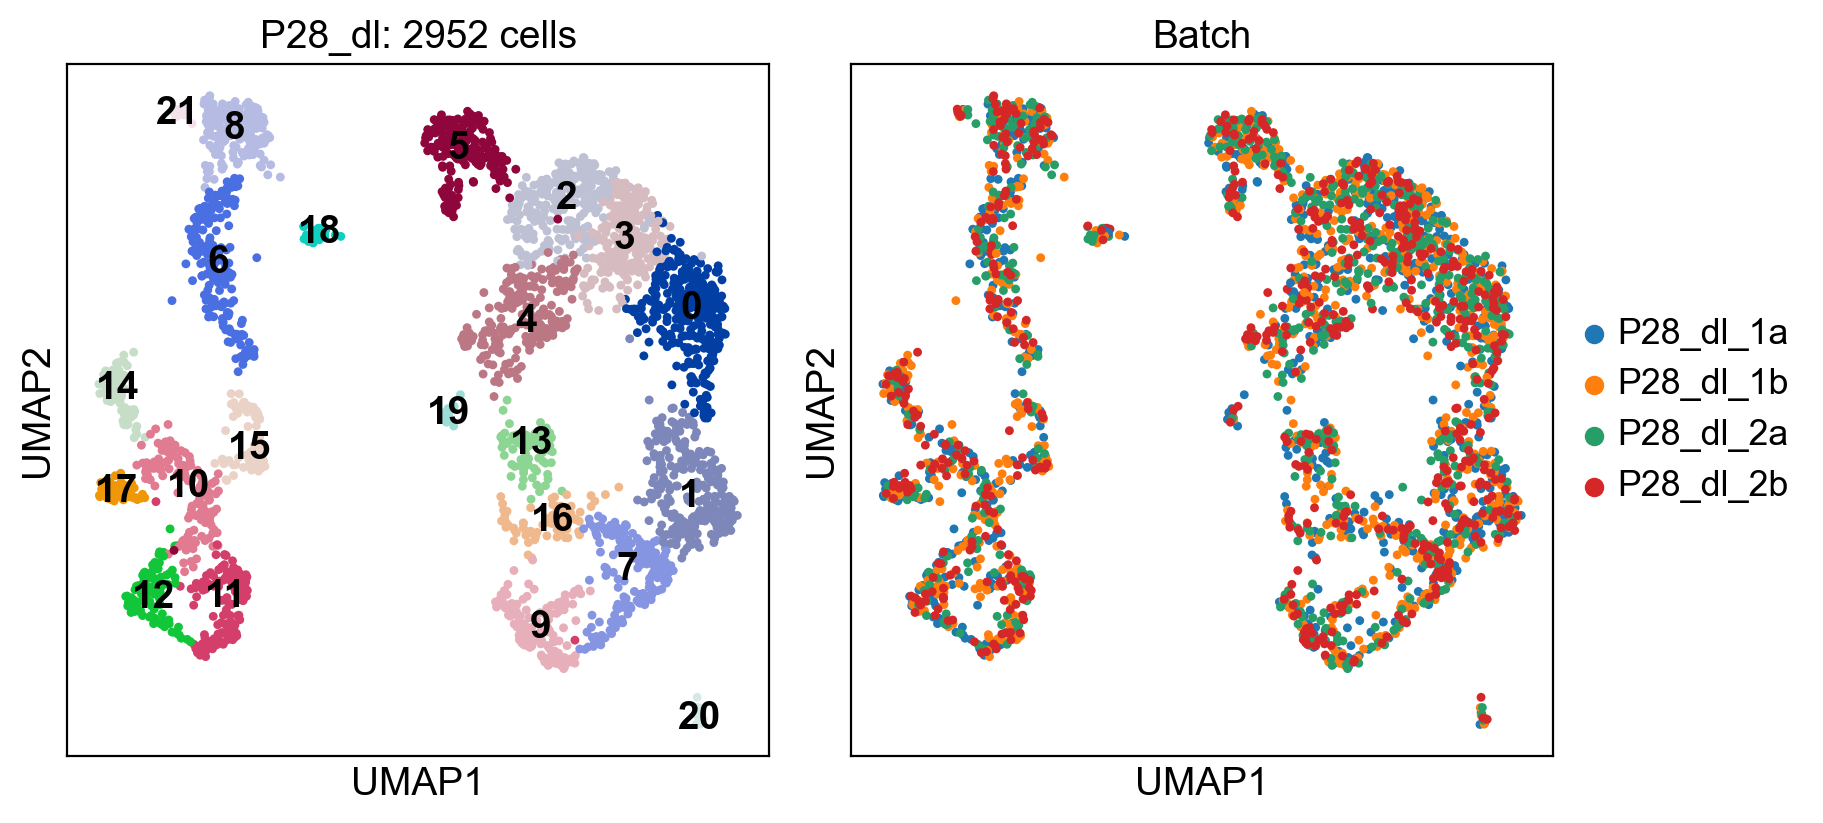

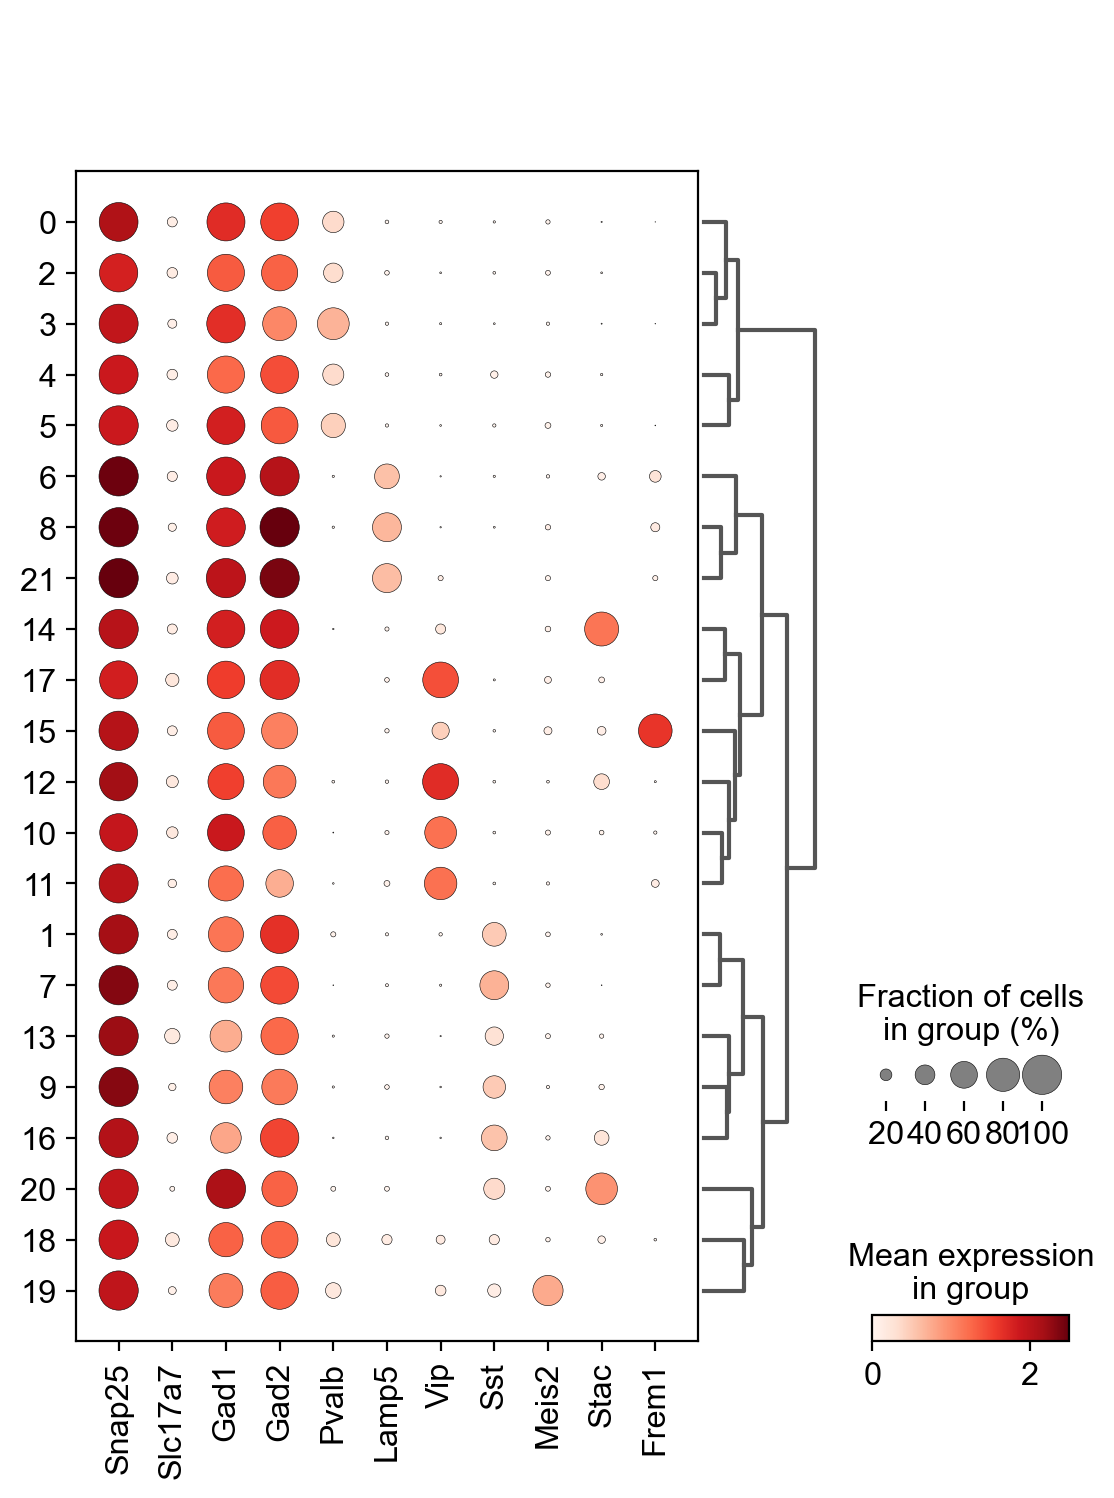

In [20]:
sc.tl.dendrogram(P28_gaba, groupby='leiden')
fig, axs = plt.subplots(1, 2, figsize = (9,4), constrained_layout=True)

'''
sc.pl.umap(P28_gaba, color='cluster', ax=axs[0], 
           show=False, legend_fontsize='10', legend_loc='on data',
           title='P28: ' + str(P28_gaba.shape[0]) + ' cells', 
          palette=('#17becf', '#8c564b', '#ffbb78', '#e377c2', '#ff7f0e', '#d62728', 
                  '#aec7e8', '#ff9896', '#98df8a', '#dbdb8d', '#f7b6d2', '#1f77b4', '#b5bd61', 
                  '#aa40fc', '#c5b0d5', '#c49c94'), frameon=True)
'''
sc.pl.umap(P28_gaba, color='leiden', ax=axs[0], show=False, 
           title='P28_dl: ' + str(P28_gaba.shape[0]) + ' cells', legend_loc='on data')
sc.pl.umap(P28_gaba, color='sample', ax=axs[1], show=False, title='Batch')

bias_markers = ['Snap25', 'Slc17a7', 'Gad1', 'Gad2', 'Pvalb', 'Lamp5', 'Vip', 'Sst', 'Meis2']

#bias_pos = [(0,6), (7,15)]
#bias_labels = ['Neuronal', 'Non-Neuronal']
sc.pl.dotplot(P28_gaba, bias_markers, groupby='leiden', dendrogram=True)

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


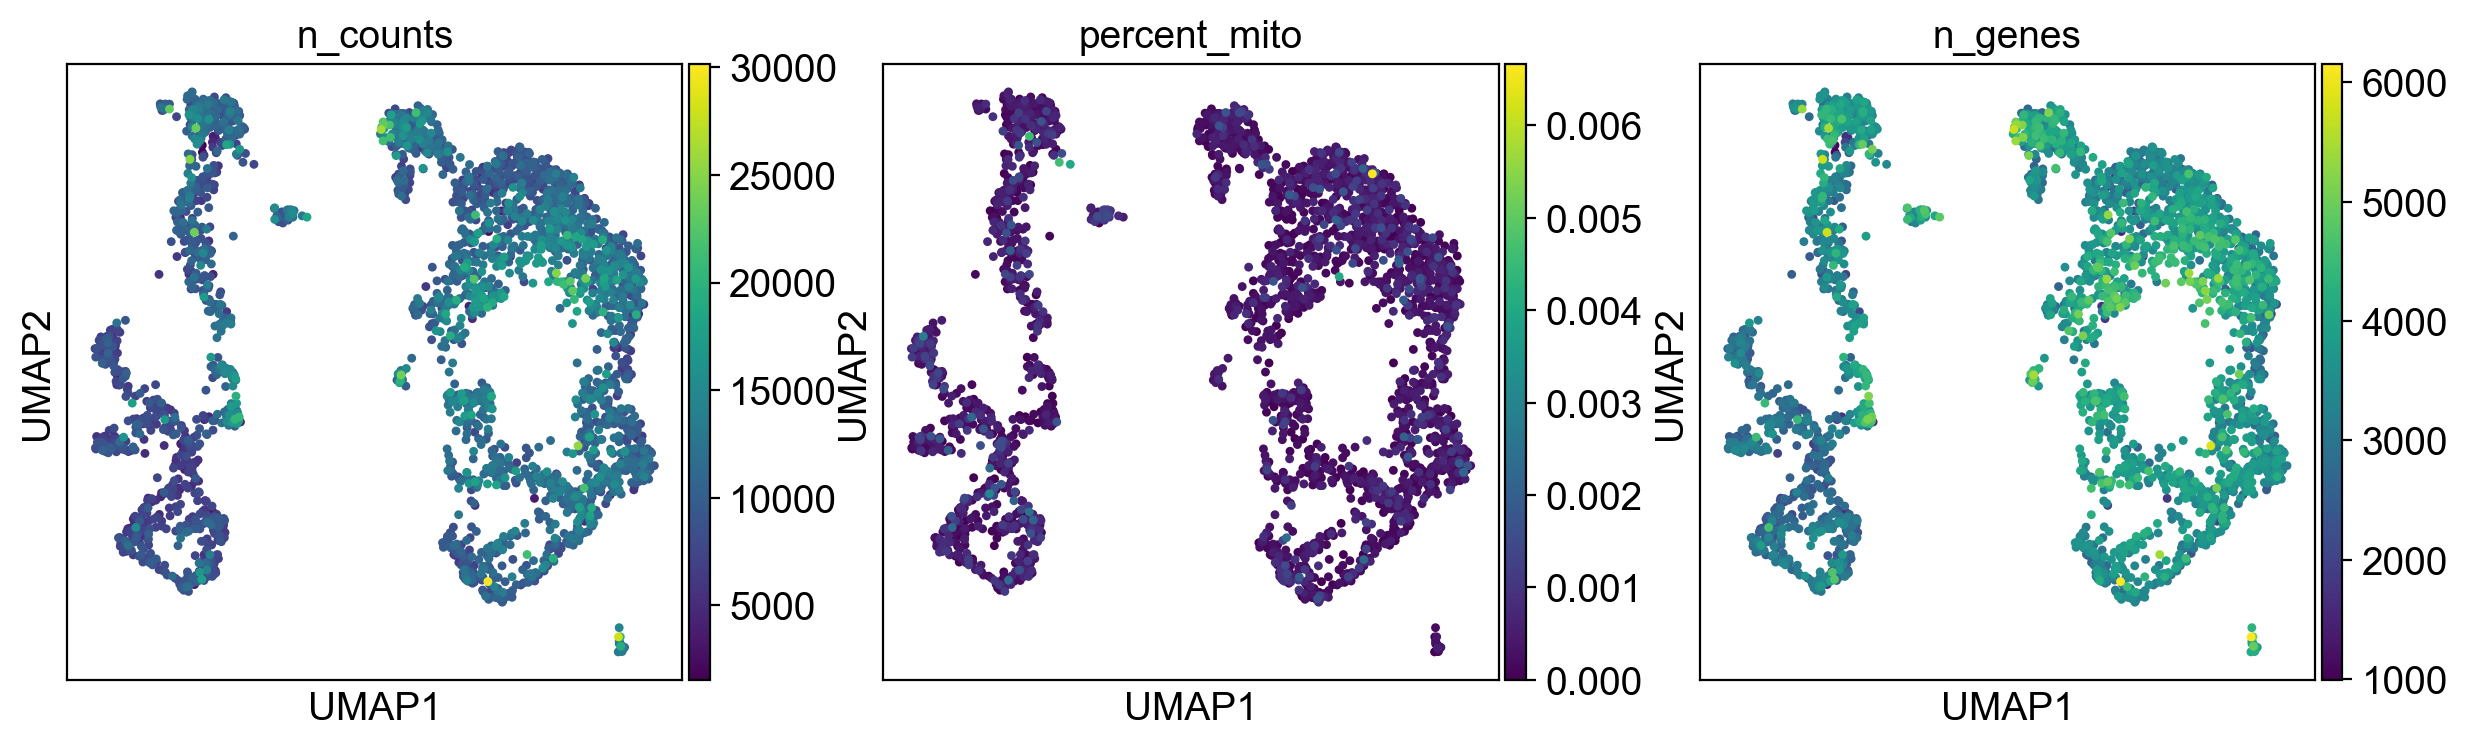

In [15]:
sc.pl.umap(P28_gaba, color=['n_counts', 'percent_mito', 'n_genes'])

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


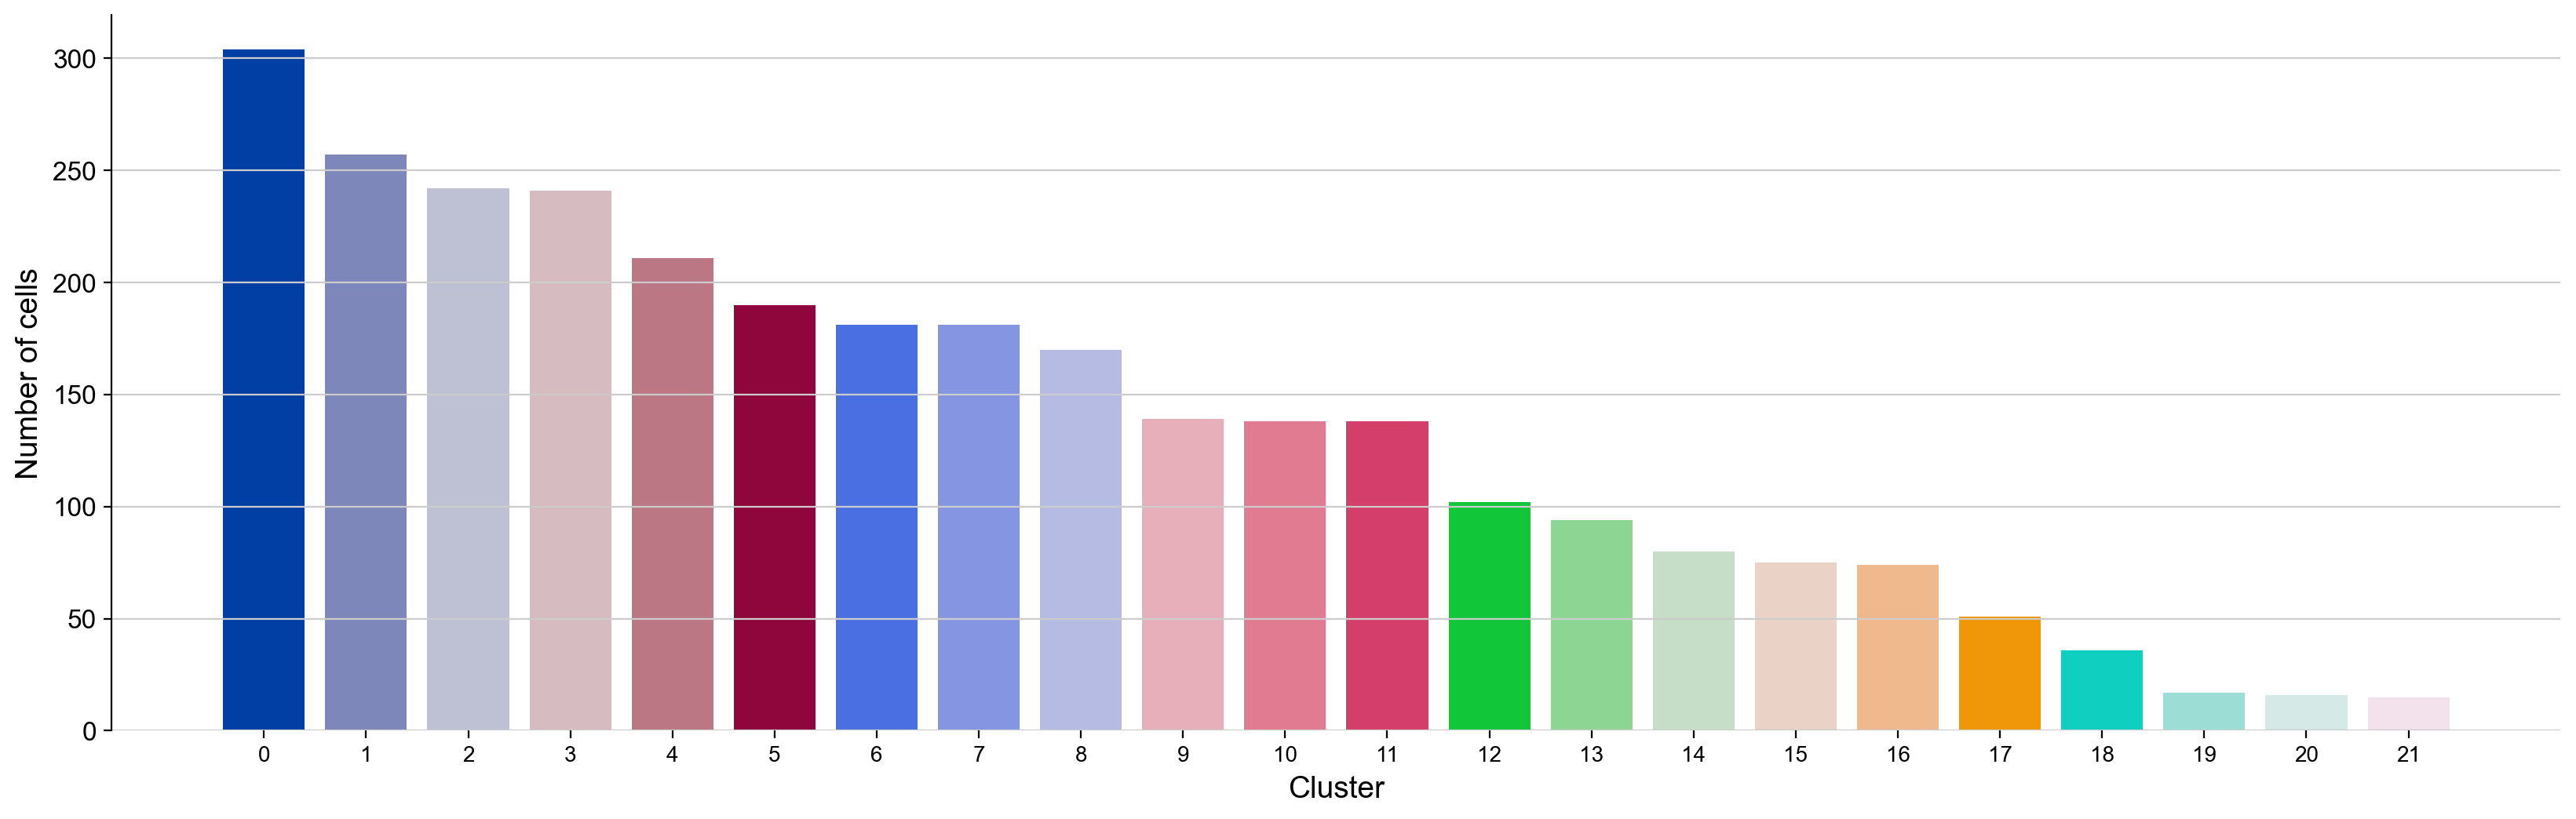

In [16]:
#code
x_pos = list(P28_gaba.obs.leiden.values.categories)

total_cells = P28_gaba.shape[0]
cell_fraction = []
cell_count = []

for i in x_pos:
    #cell_fraction.append(P28_gaba[P28_gaba.obs.leiden==i, :].shape[0]*100/total_cells)
    cell_fraction.append(P28_gaba[P28_gaba.obs.leiden==i, :].shape[0])
    cell_count.append(P28_gaba[P28_gaba.obs.leiden==i, :].shape[0])


fig, ax = plt.subplots(figsize=(20,6))

right_side = ax.spines["right"]
top = ax.spines["top"]
bottom = ax.spines["bottom"]

right_side.set_visible(False)
top.set_visible(False)
bottom.set_visible(False)


plt.bar(x_pos, cell_fraction, color = P28_gaba.uns['leiden_colors'])
plt.grid(axis='x')
plt.xticks(rotation='0', fontsize='10')
plt.yticks(fontsize ='12')

plt.xlabel('Cluster', rotation='0')
plt.ylabel('Number of cells')

#plt.yticks(np.linspace(0, 250, 5))
plt.show()

In [27]:
P28_gaba.write_h5ad('P28_gaba_dr_Clustered.h5ad')

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


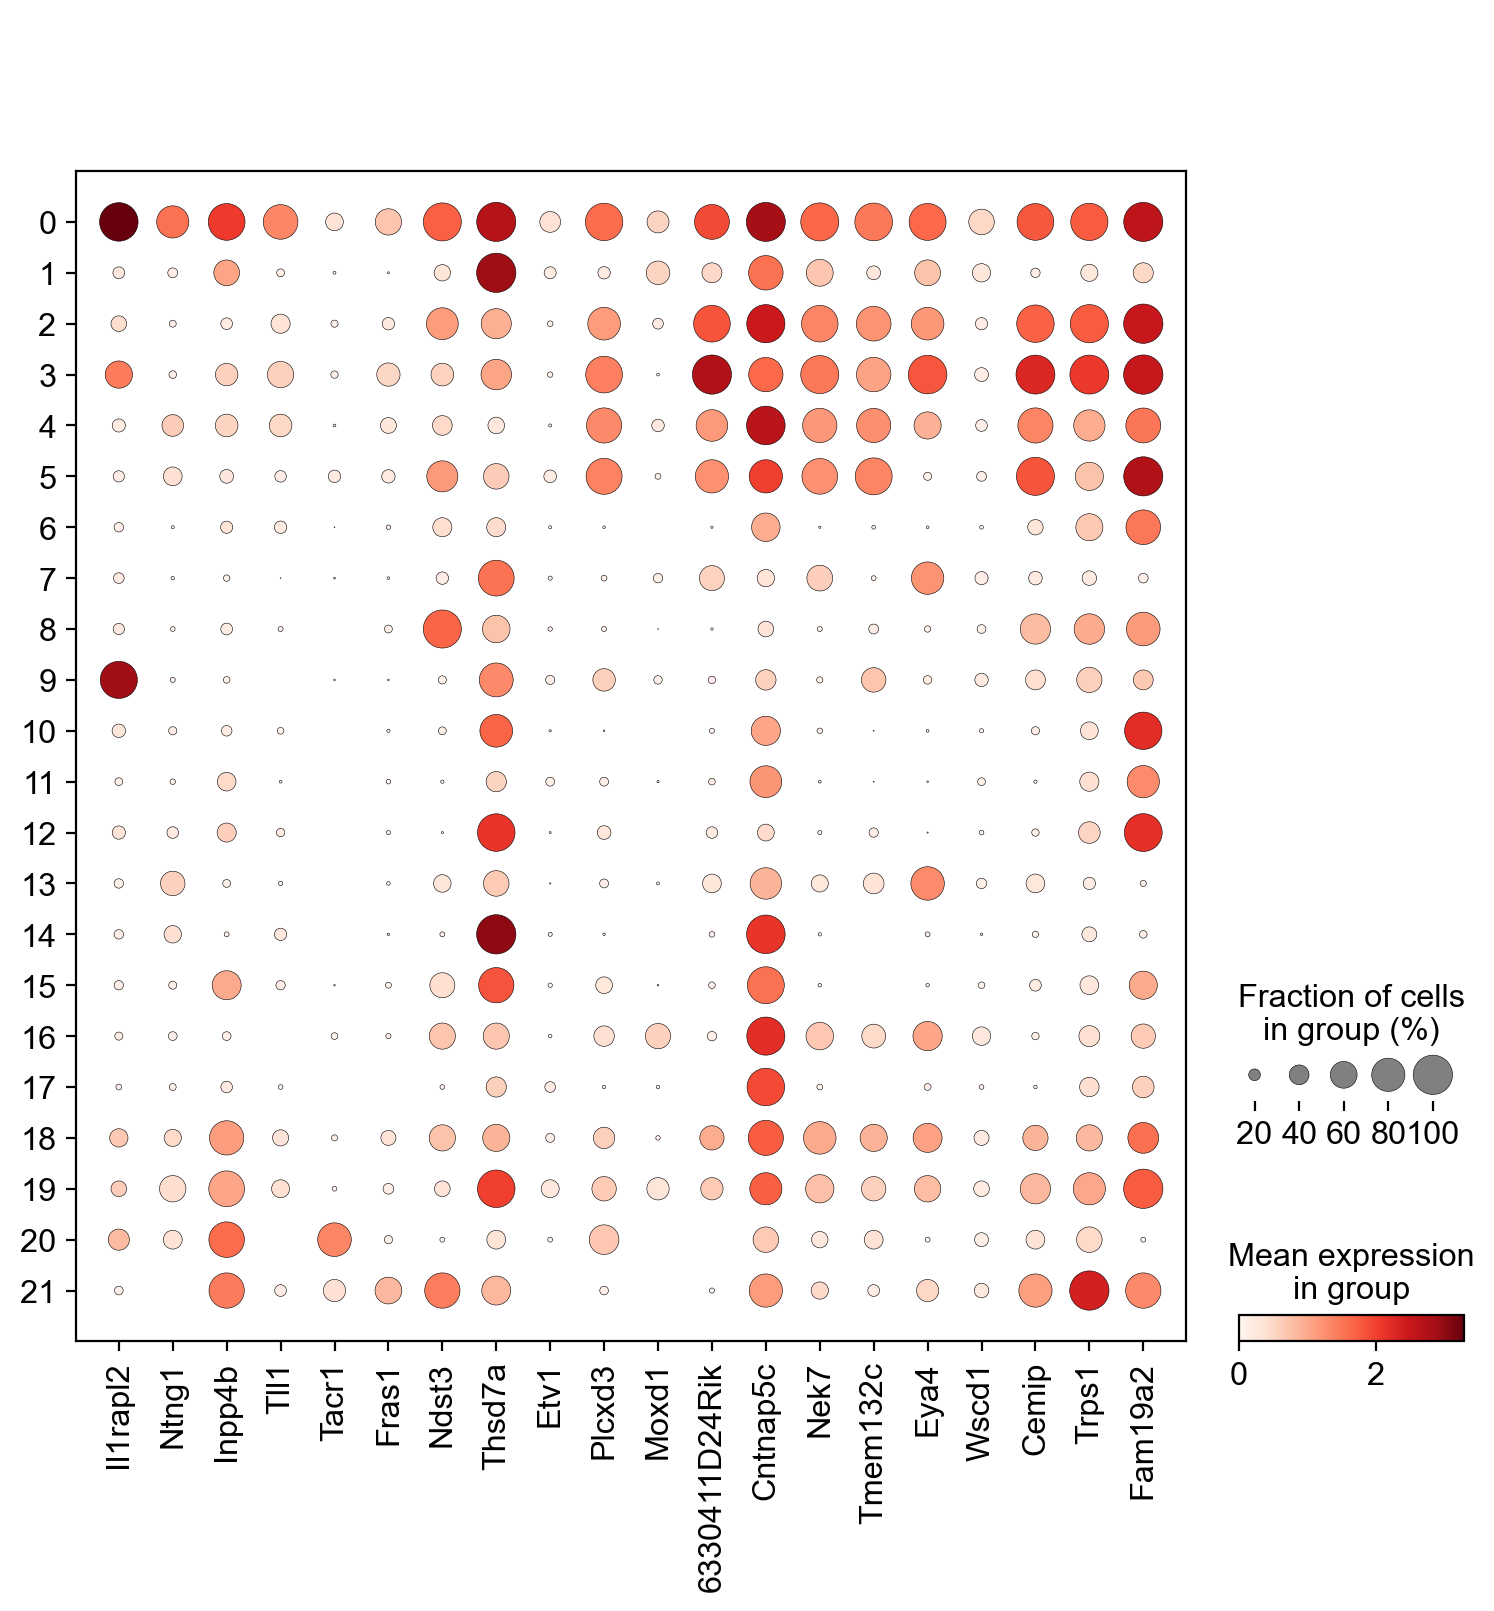

['Il1rapl2', 'Ntng1', 'Inpp4b', 'Tll1', 'Tacr1', 'Fras1', 'Ndst3', 'Thsd7a', 'Etv1', 'Plcxd3', 'Moxd1']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


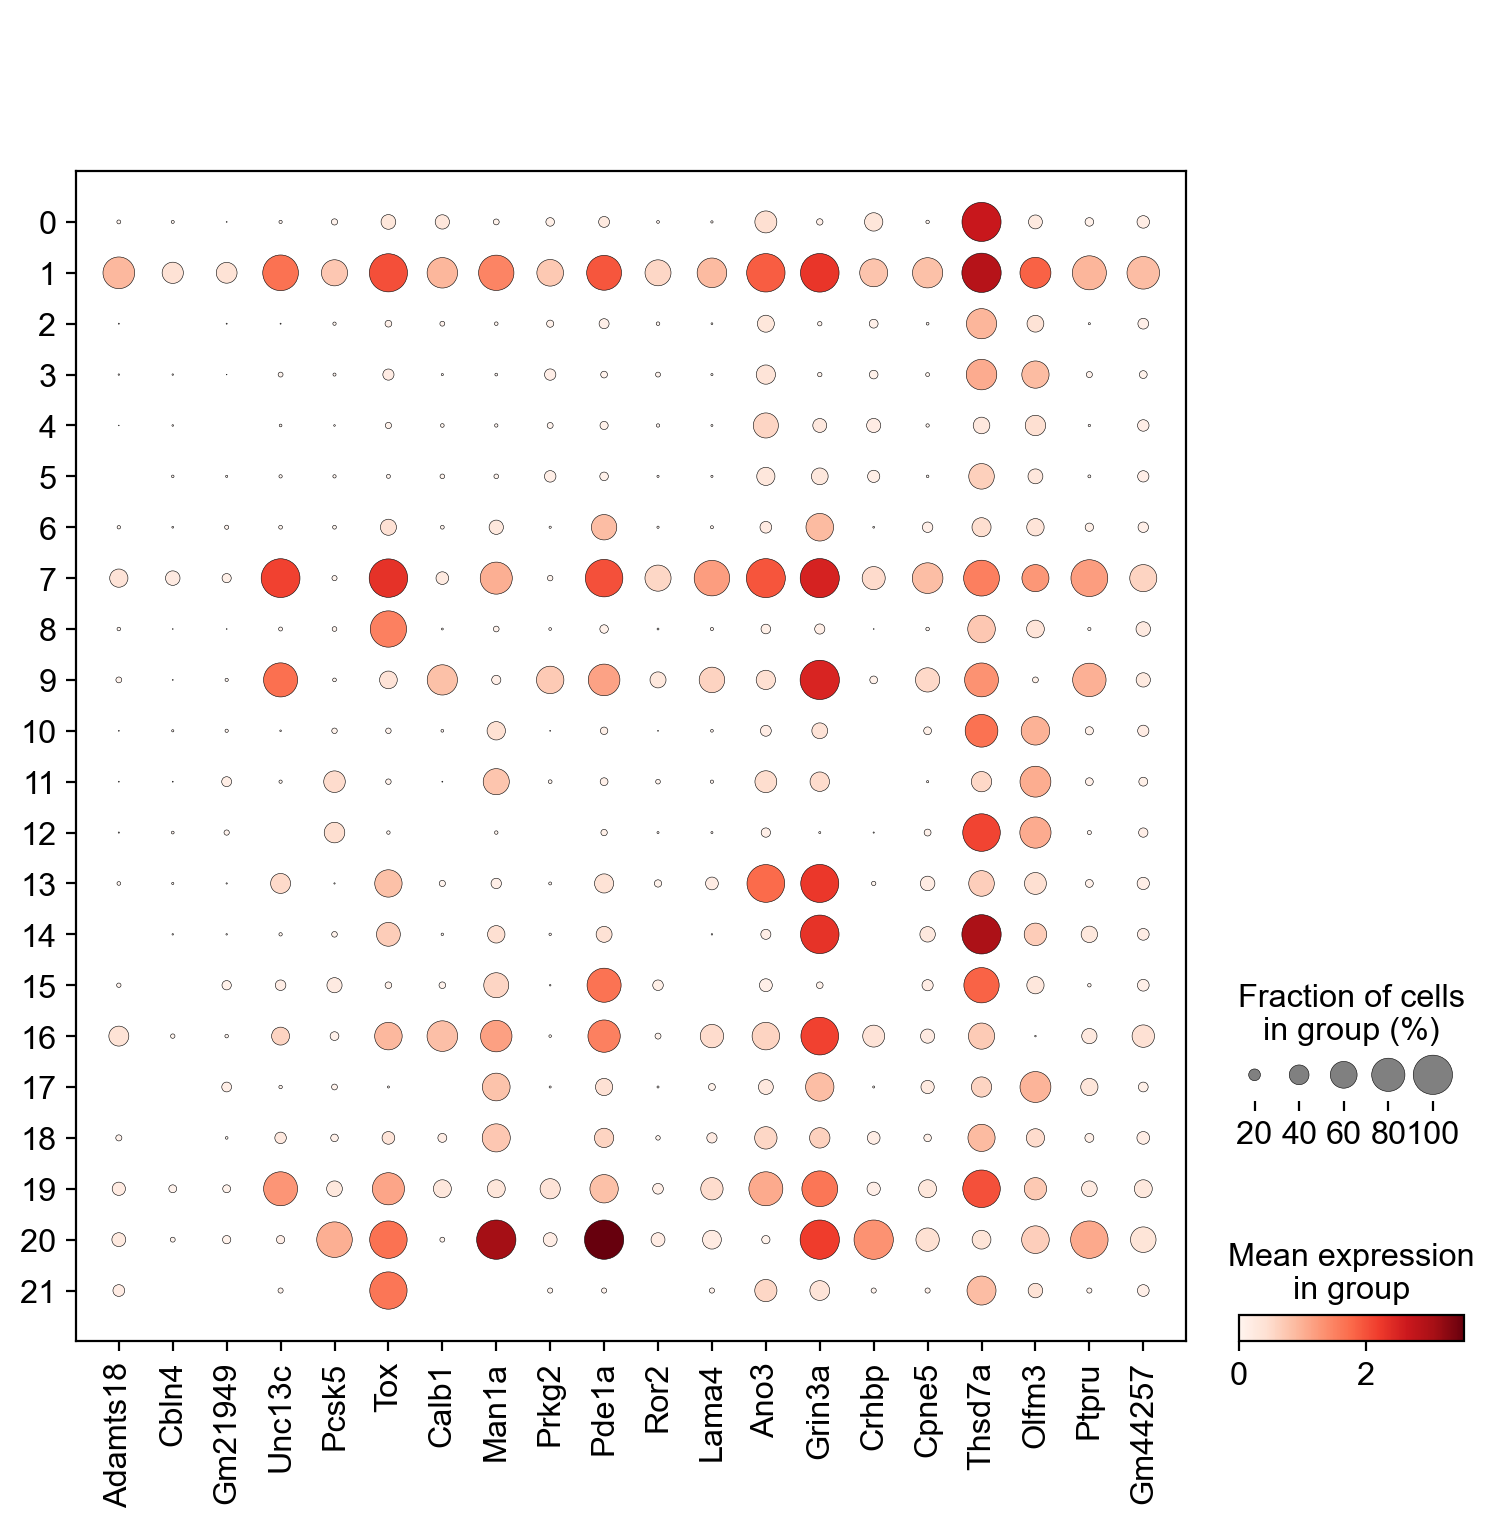

['Adamts18', 'Cbln4', 'Gm21949', 'Unc13c', 'Pcsk5', 'Tox', 'Calb1', 'Man1a', 'Prkg2', 'Pde1a', 'Ror2']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


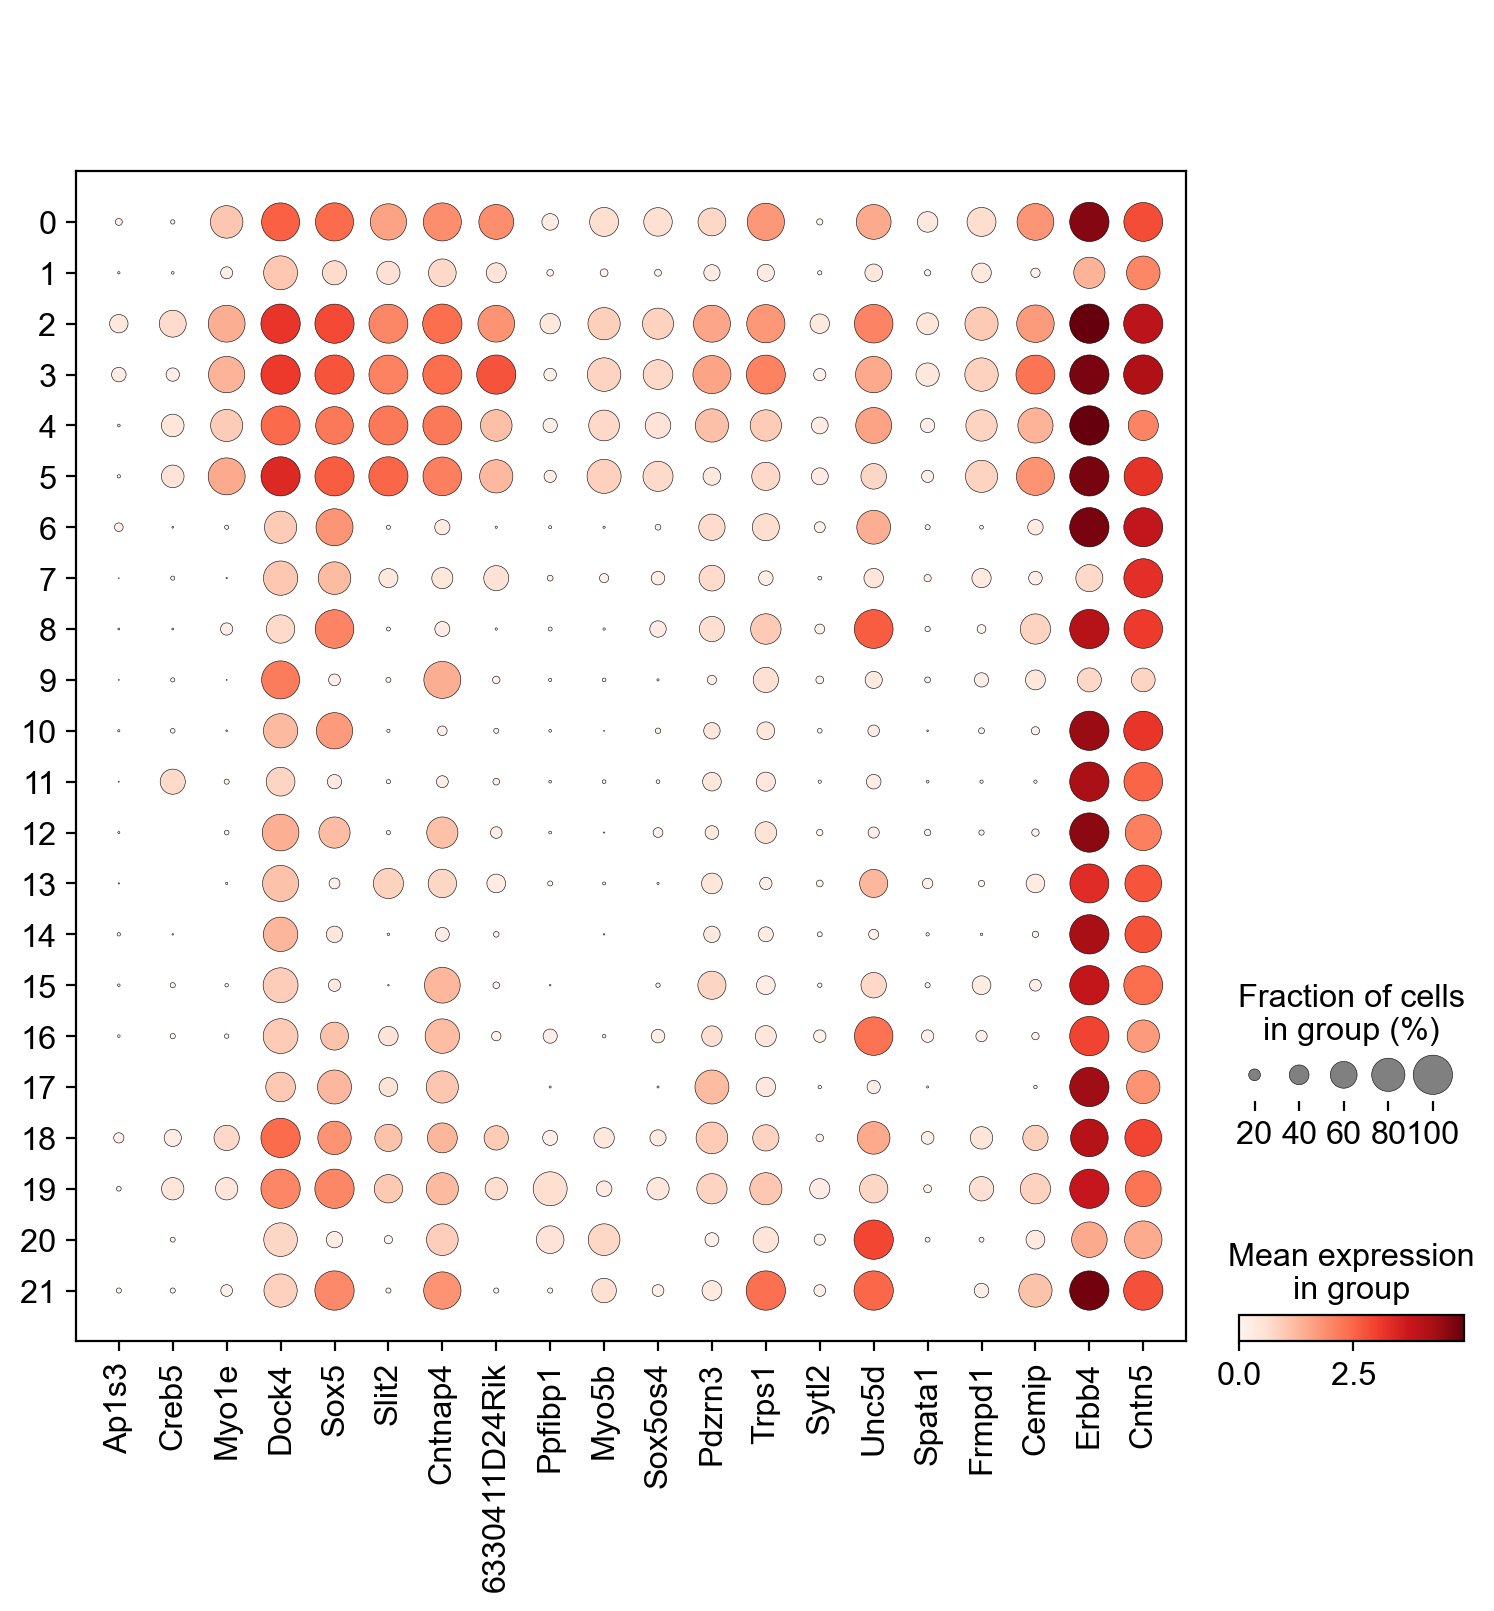

['Ap1s3', 'Creb5', 'Myo1e', 'Dock4', 'Sox5', 'Slit2', 'Cntnap4', '6330411D24Rik', 'Ppfibp1', 'Myo5b', 'Sox5os4']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


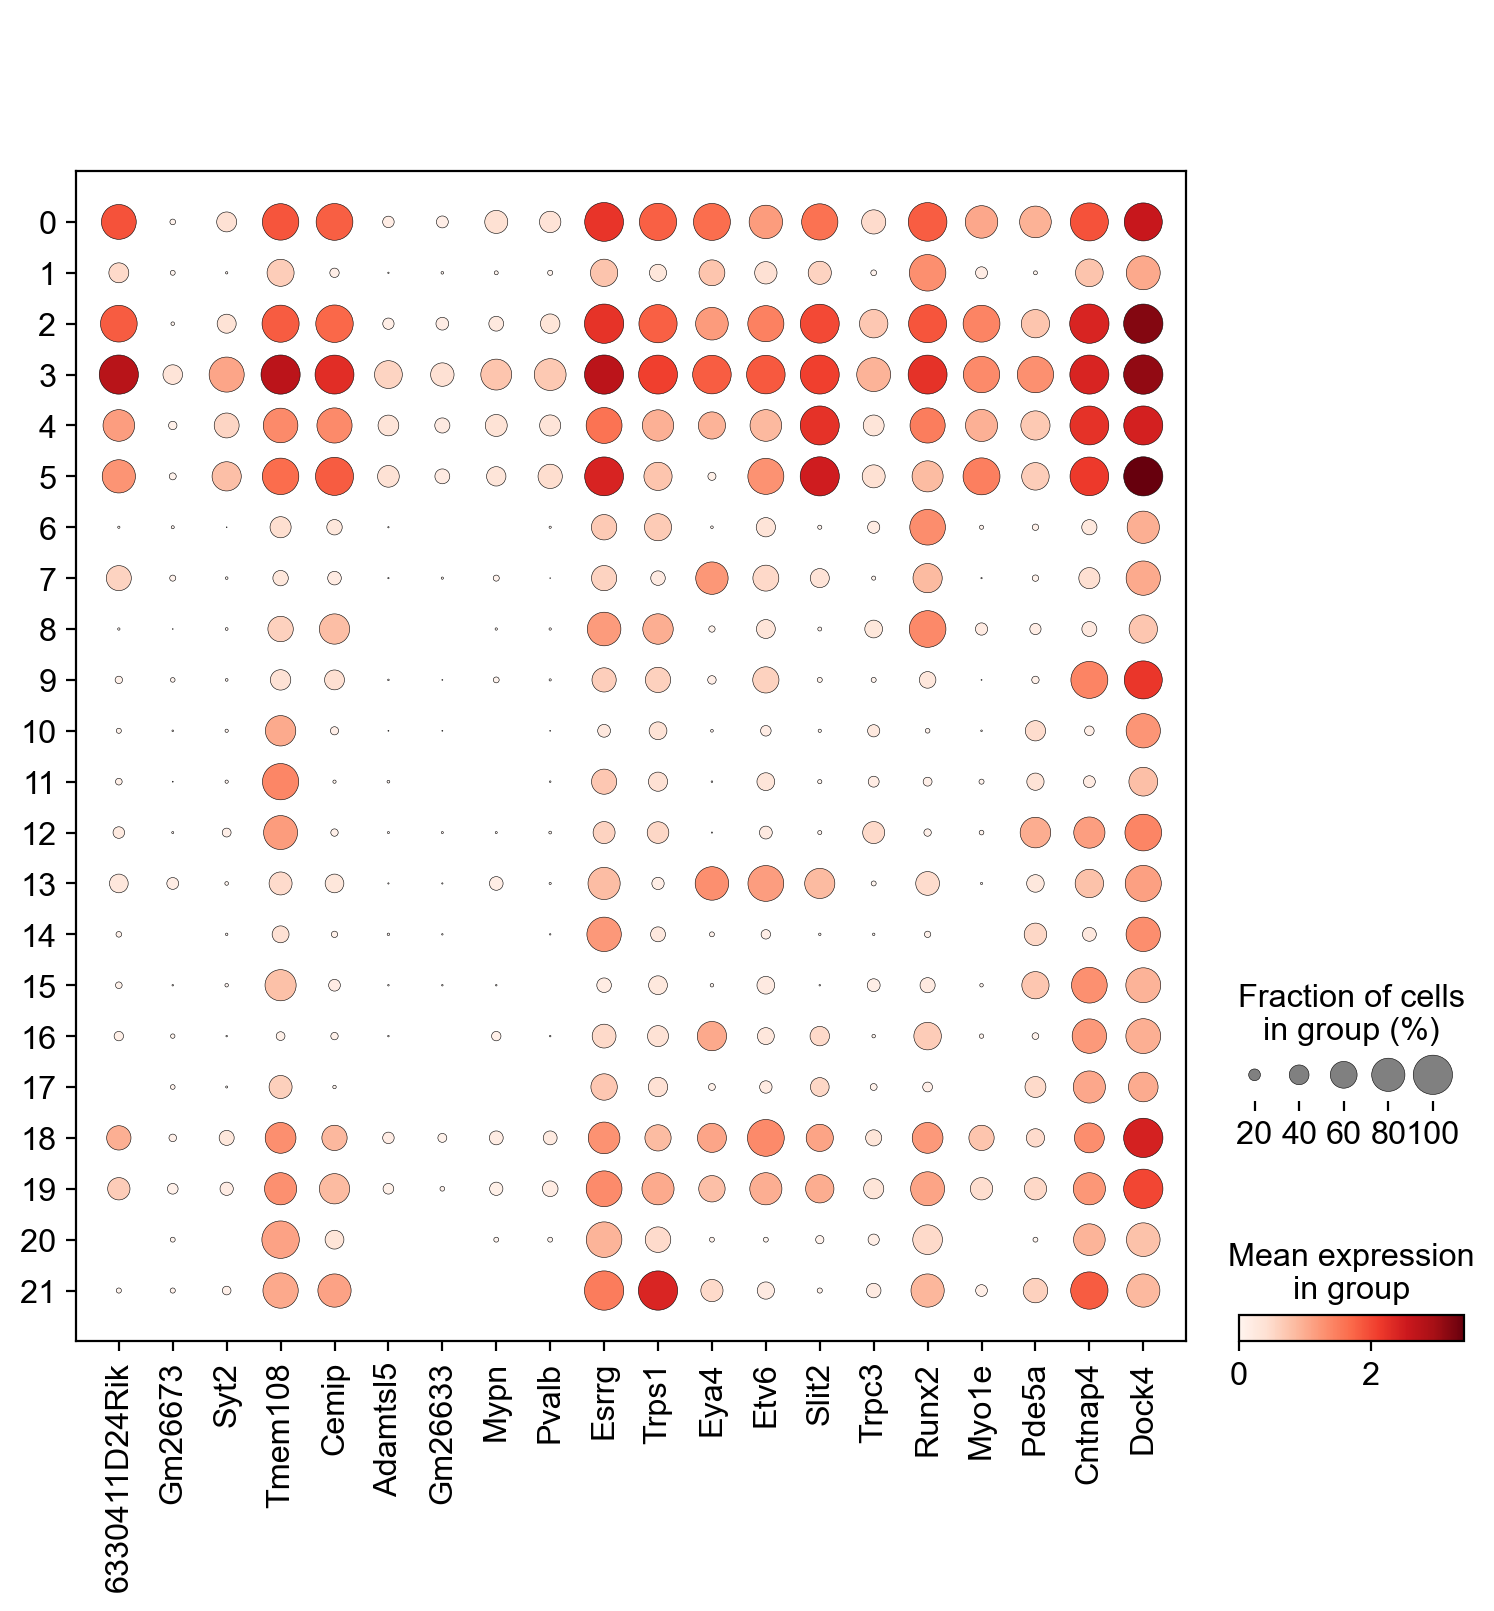

['6330411D24Rik', 'Gm26673', 'Syt2', 'Tmem108', 'Cemip', 'Adamtsl5', 'Gm26633', 'Mypn', 'Pvalb', 'Esrrg', 'Trps1']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


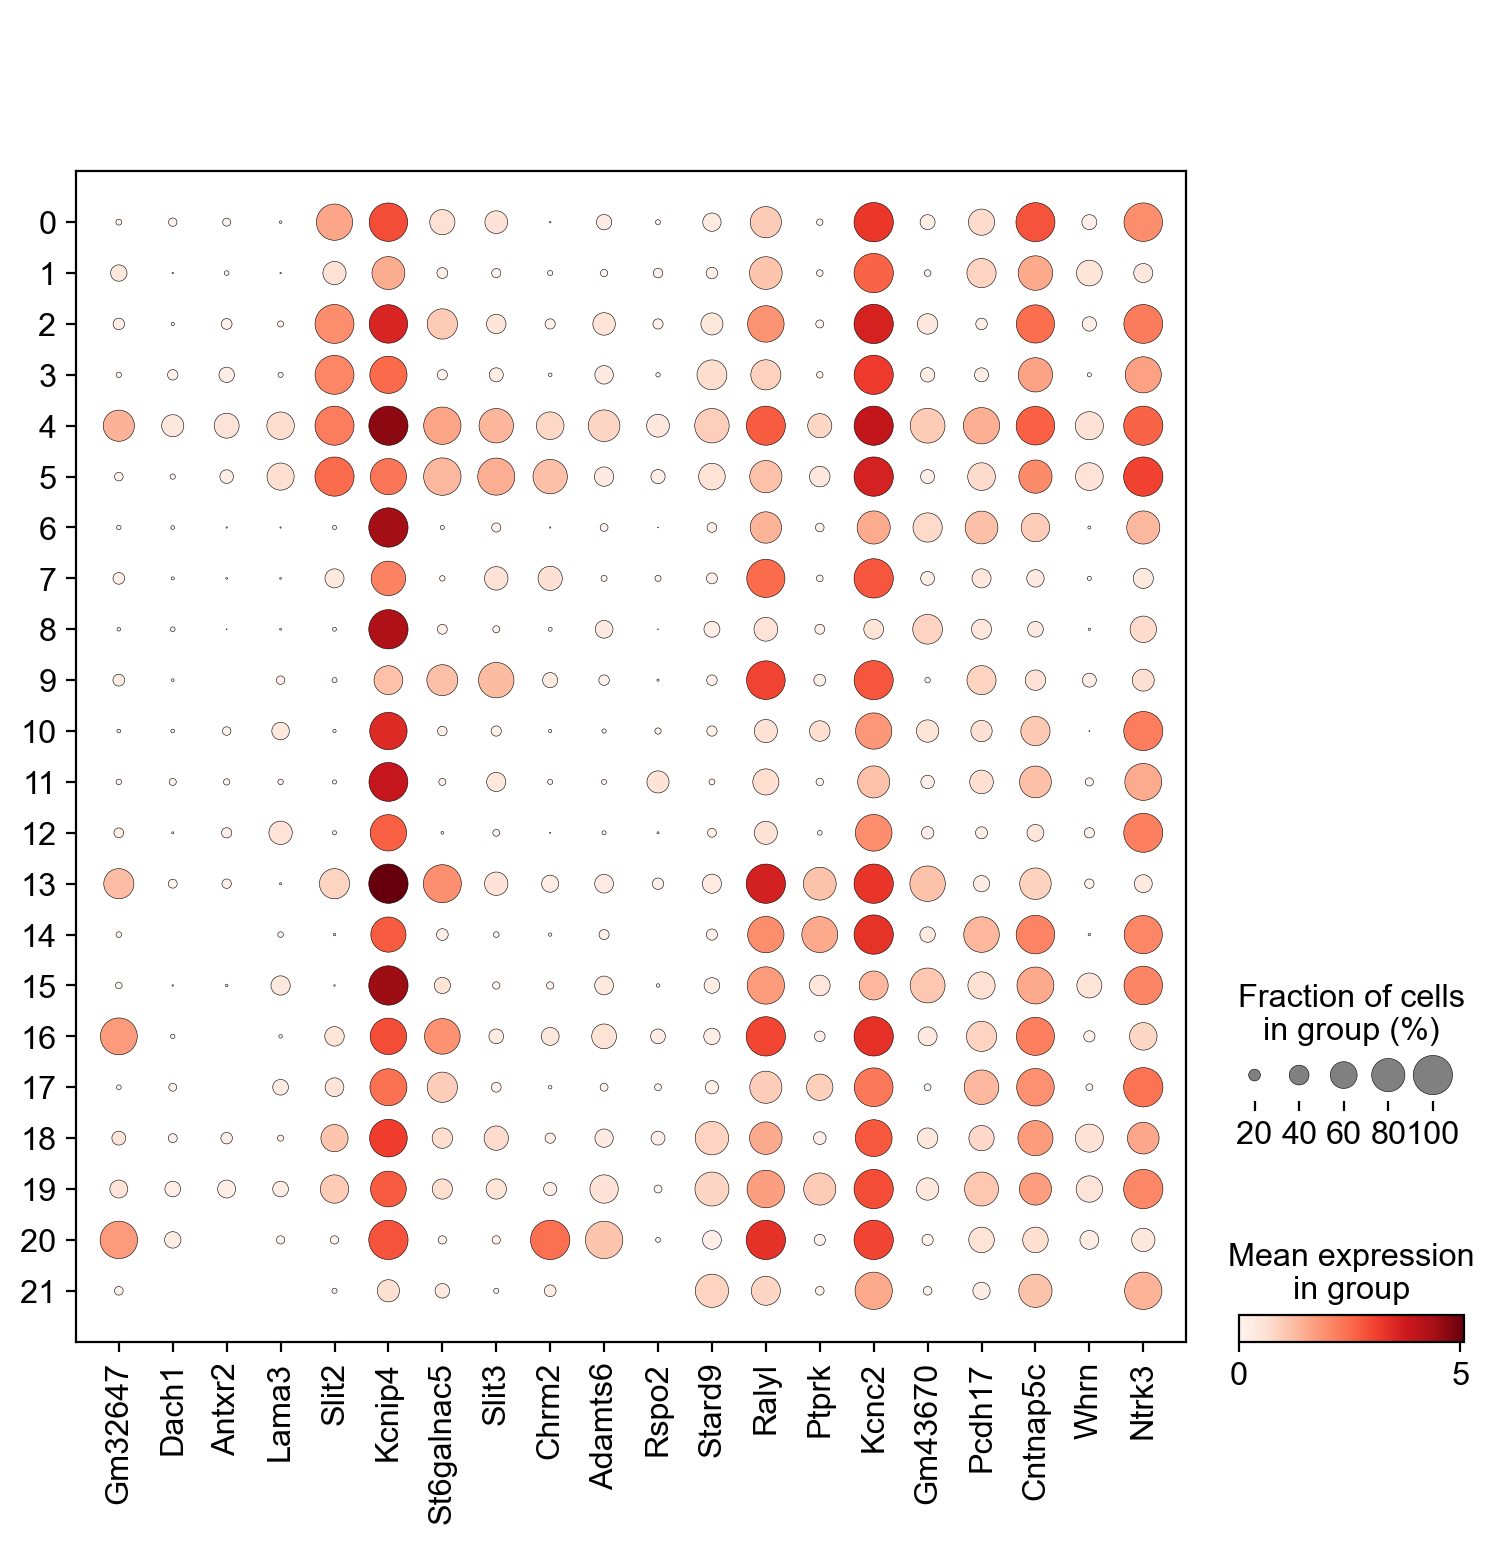

['Gm32647', 'Dach1', 'Antxr2', 'Lama3', 'Slit2', 'Kcnip4', 'St6galnac5', 'Slit3', 'Chrm2', 'Adamts6', 'Rspo2']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


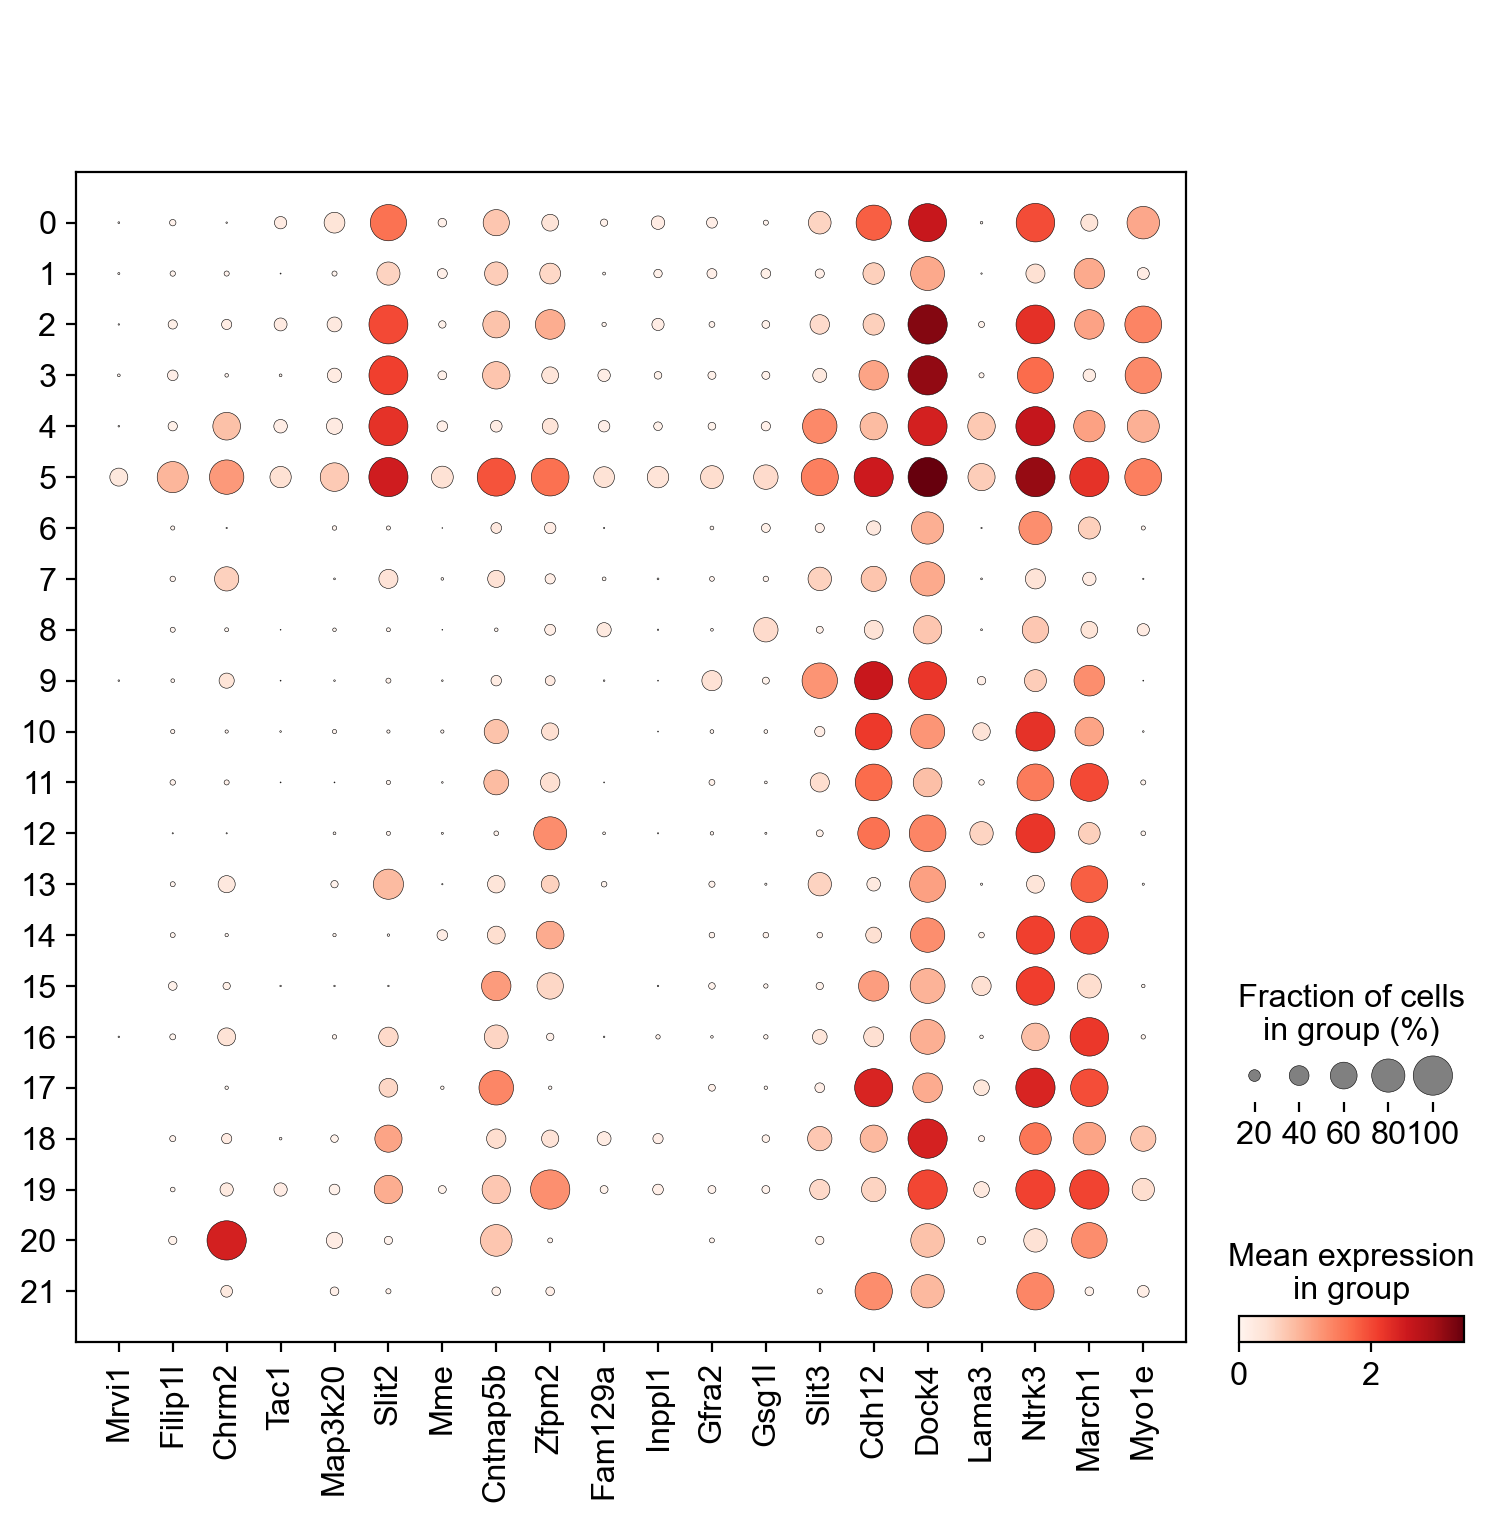

['Mrvi1', 'Filip1l', 'Chrm2', 'Tac1', 'Map3k20', 'Slit2', 'Mme', 'Cntnap5b', 'Zfpm2', 'Fam129a', 'Inppl1']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


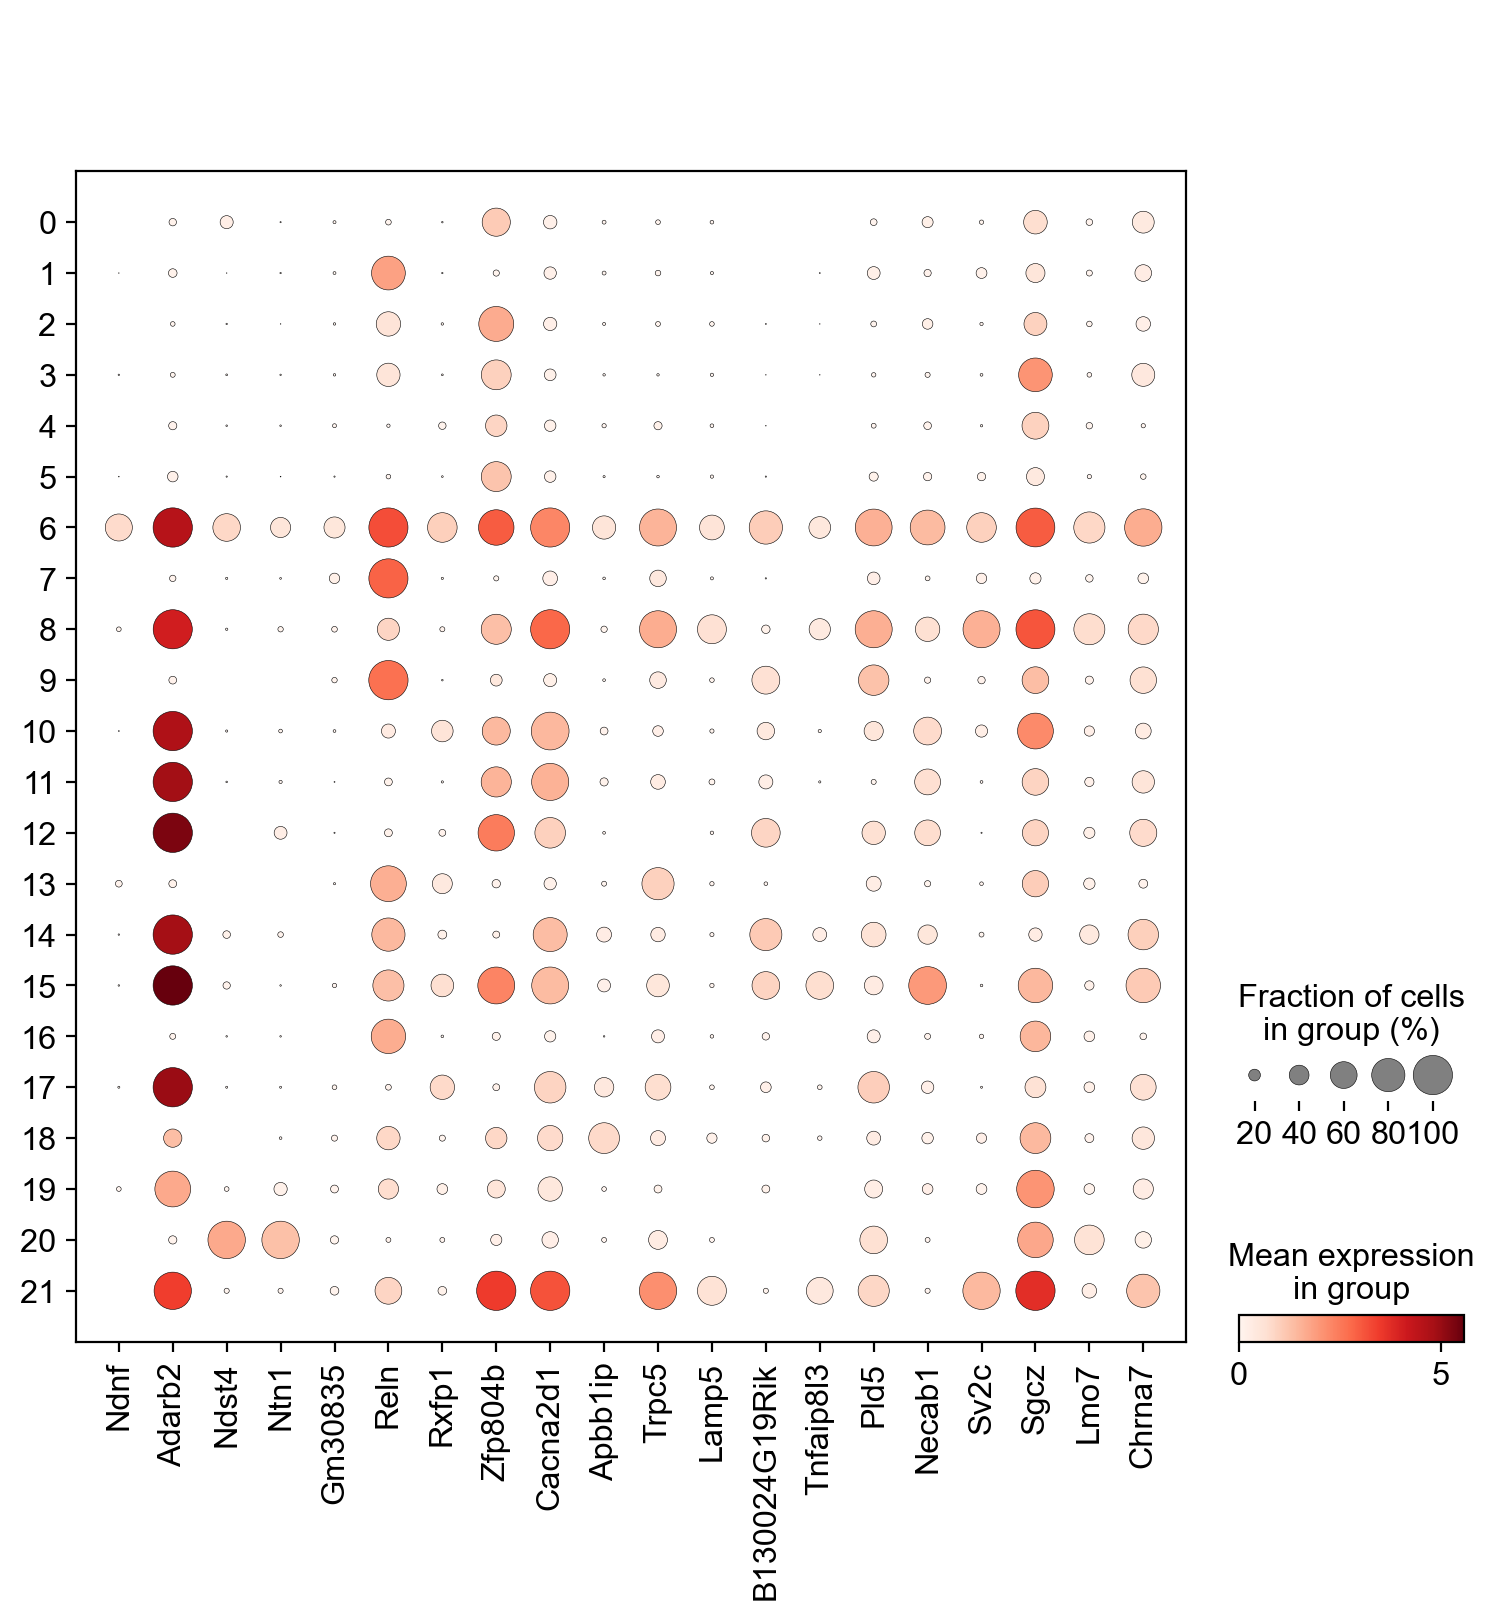

['Ndnf', 'Adarb2', 'Ndst4', 'Ntn1', 'Gm30835', 'Reln', 'Rxfp1', 'Zfp804b', 'Cacna2d1', 'Apbb1ip', 'Trpc5']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


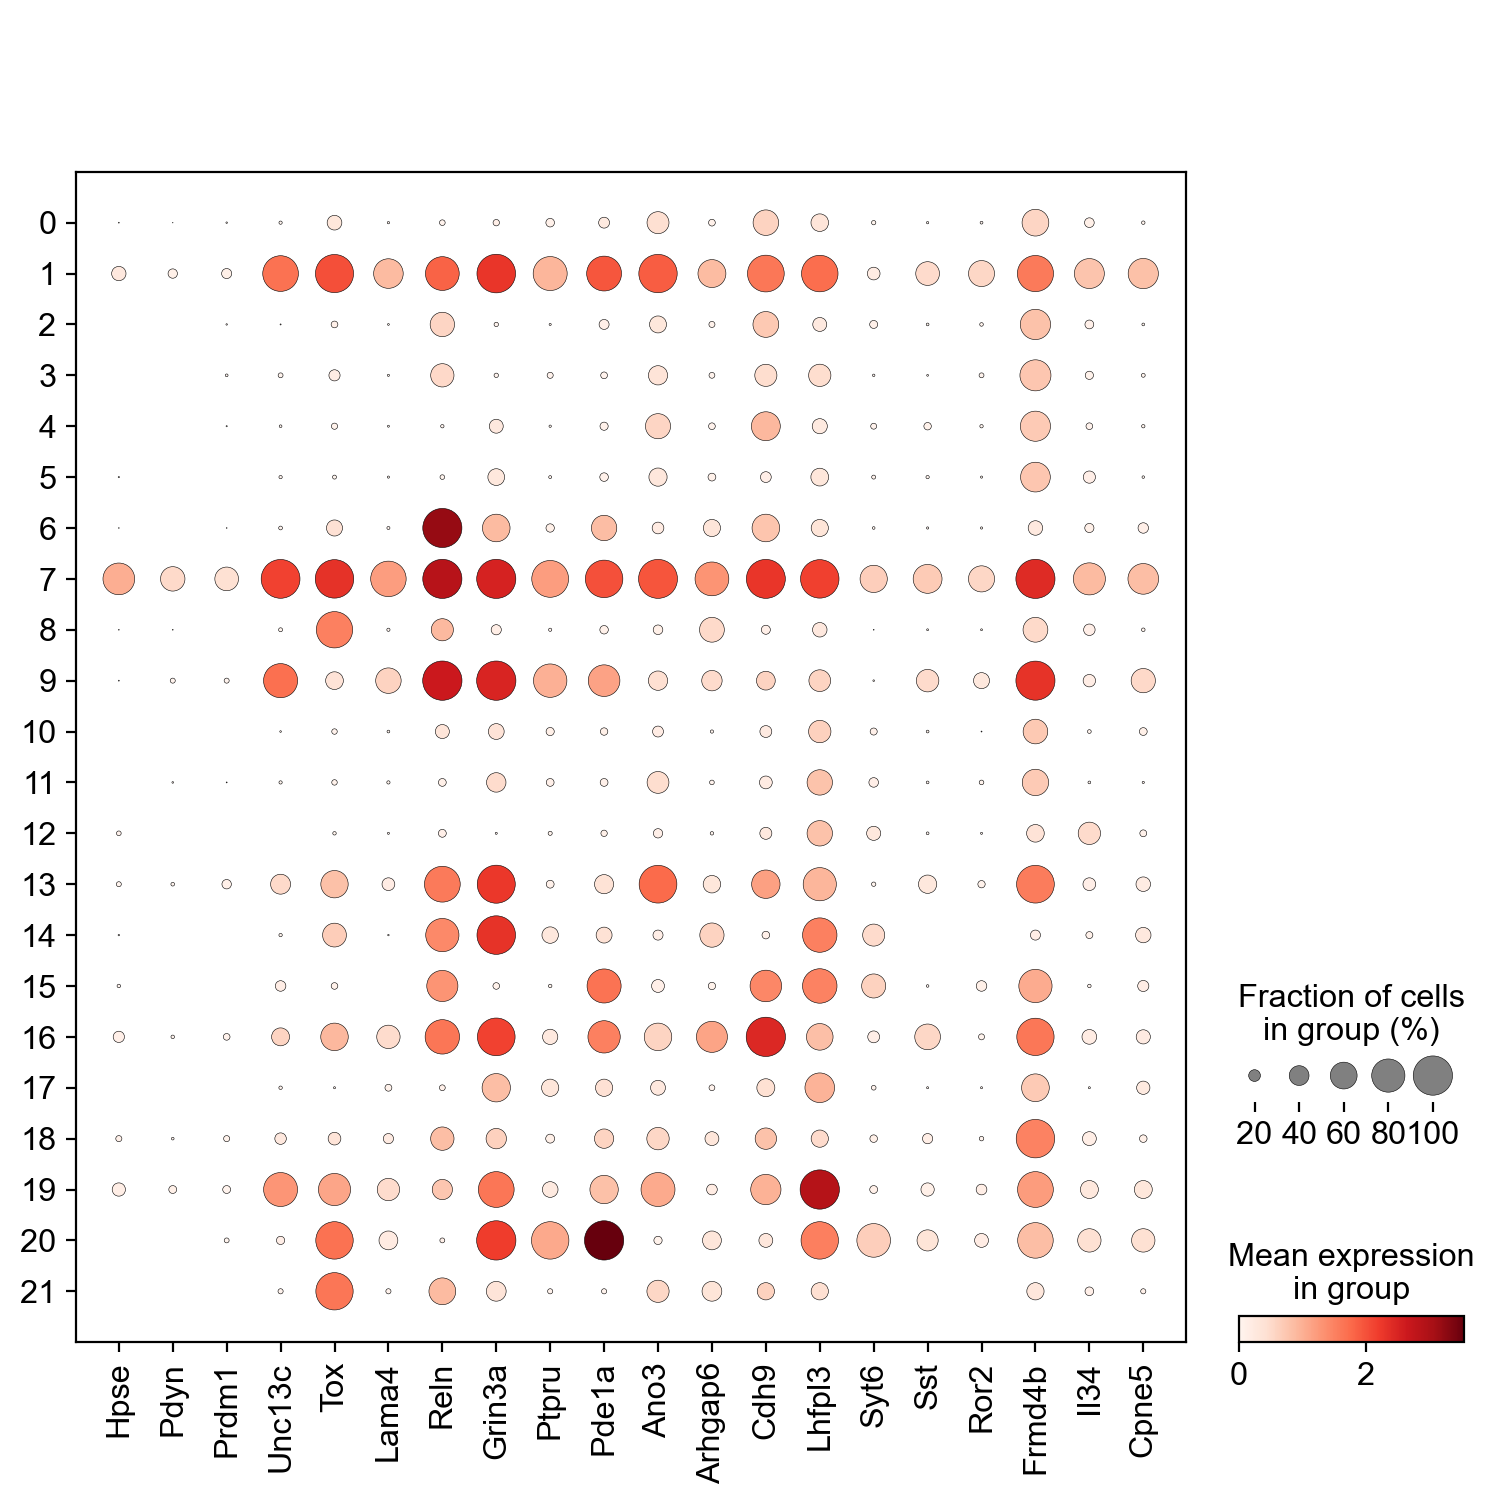

['Hpse', 'Pdyn', 'Prdm1', 'Unc13c', 'Tox', 'Lama4', 'Reln', 'Grin3a', 'Ptpru', 'Pde1a', 'Ano3']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


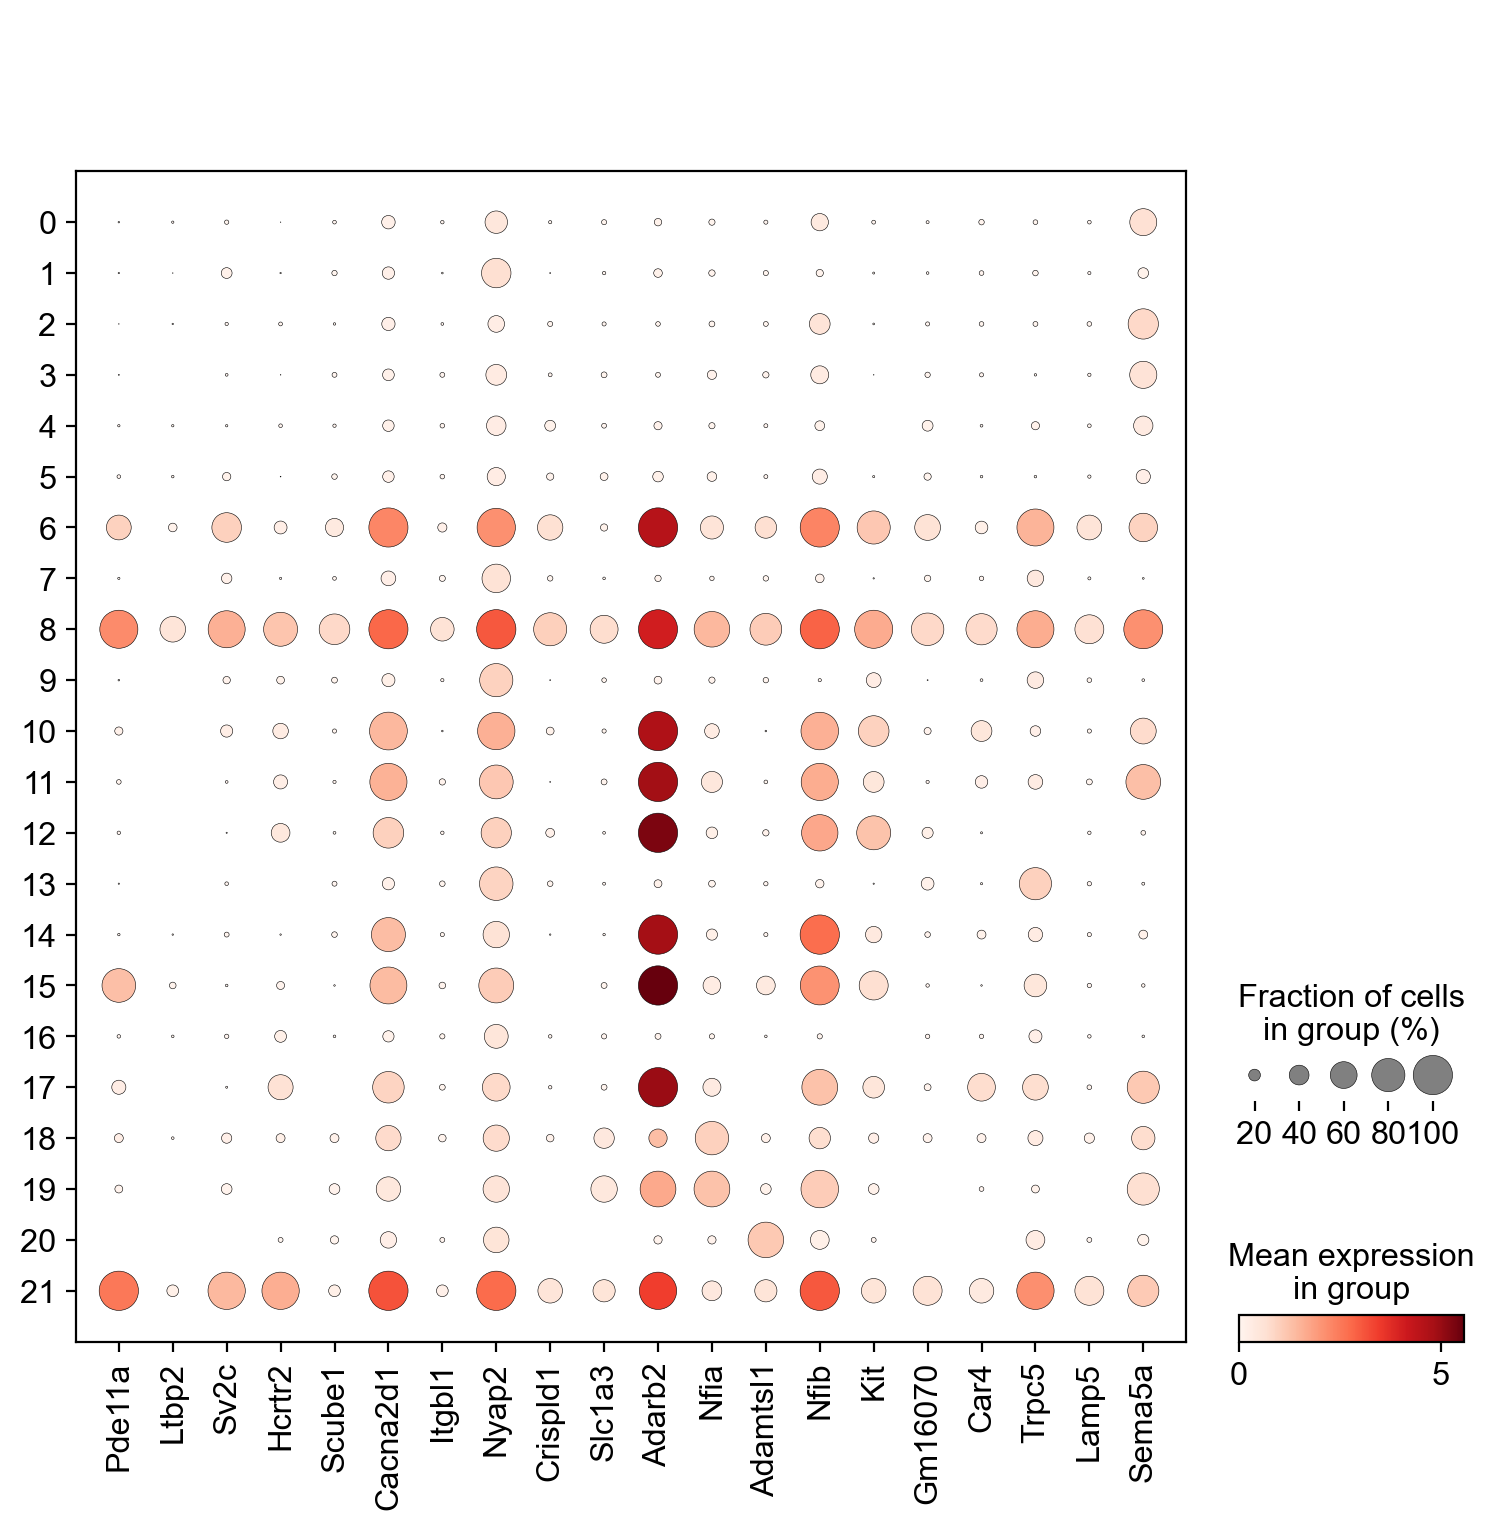

['Pde11a', 'Ltbp2', 'Sv2c', 'Hcrtr2', 'Scube1', 'Cacna2d1', 'Itgbl1', 'Nyap2', 'Crispld1', 'Slc1a3', 'Adarb2']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


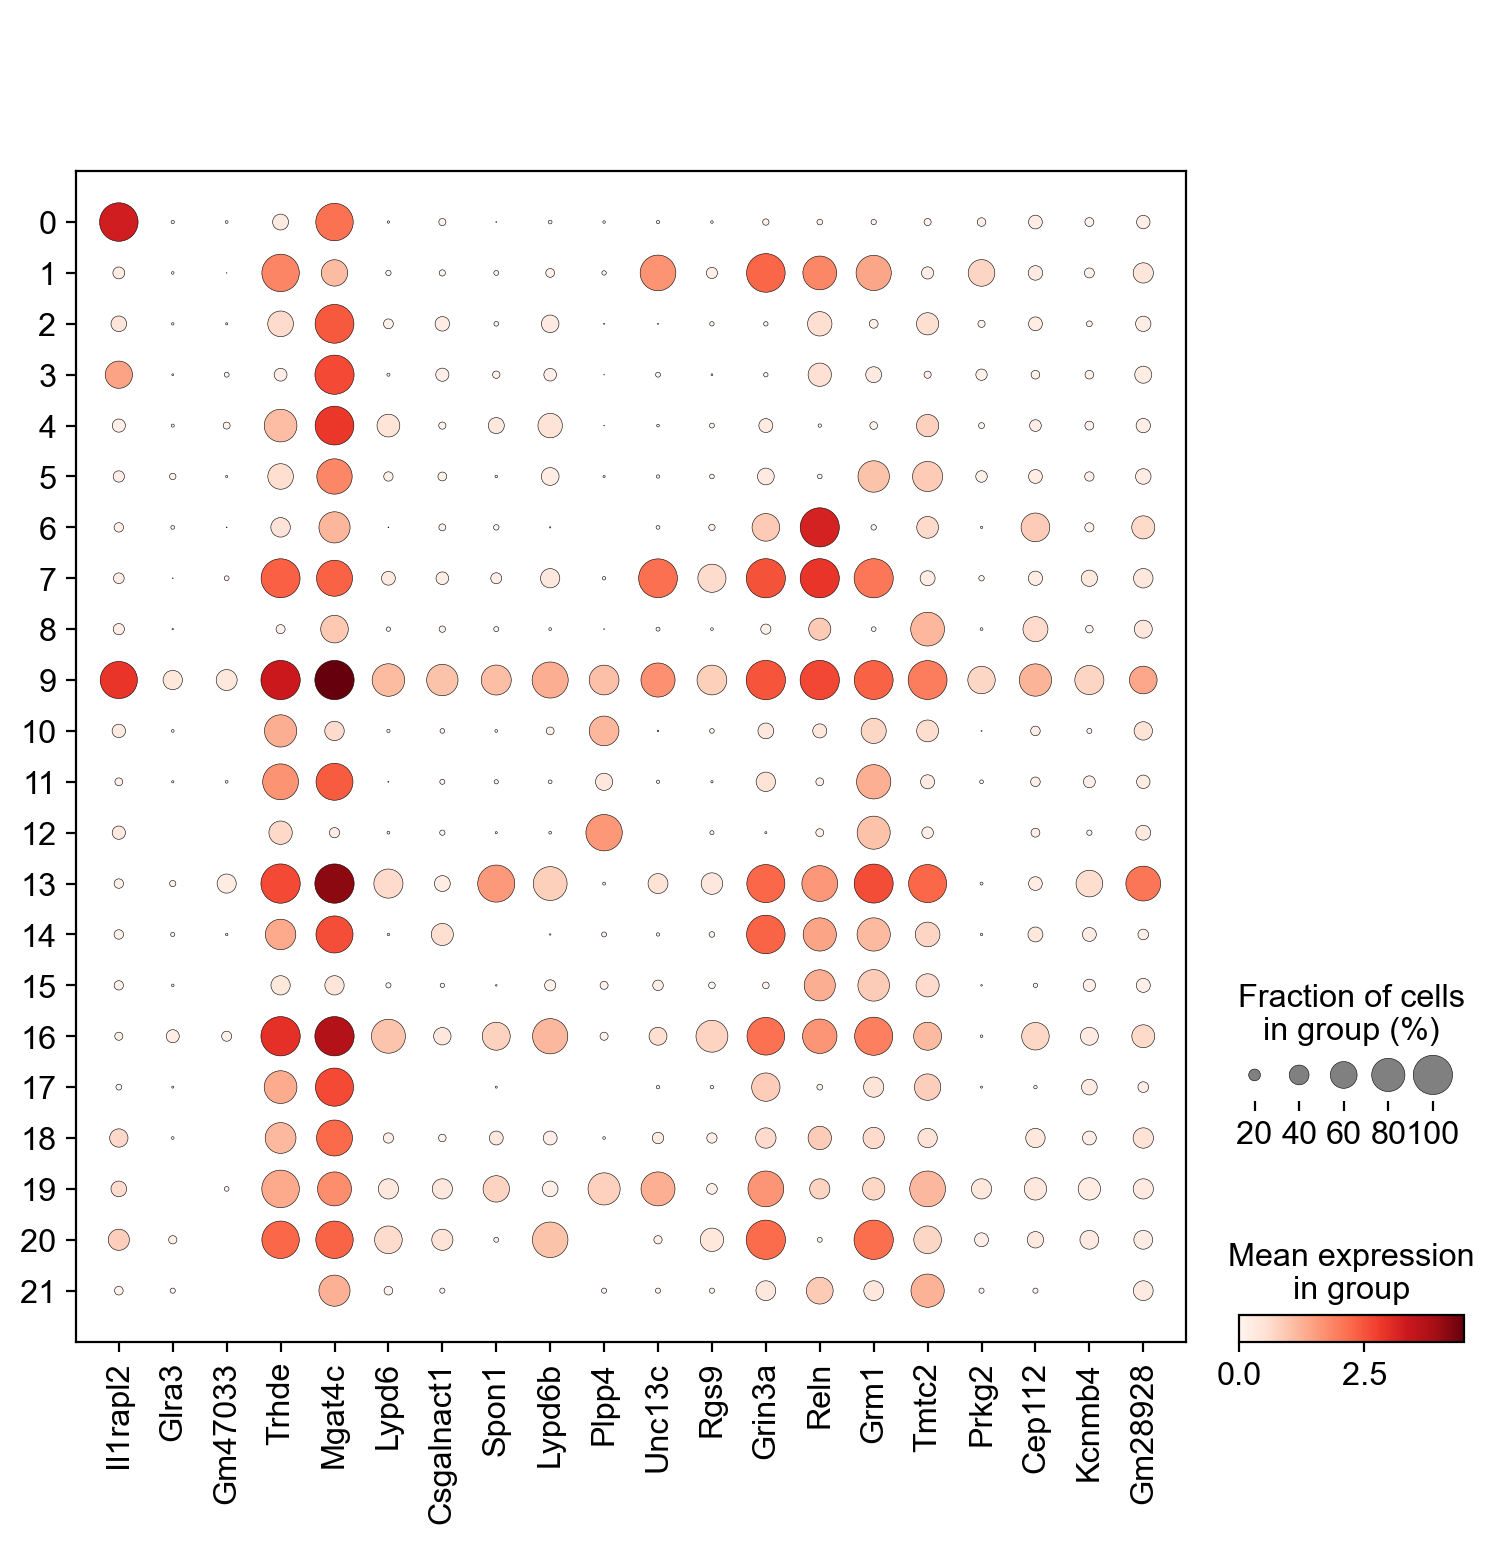

['Il1rapl2', 'Glra3', 'Gm47033', 'Trhde', 'Mgat4c', 'Lypd6', 'Csgalnact1', 'Spon1', 'Lypd6b', 'Plpp4', 'Unc13c']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


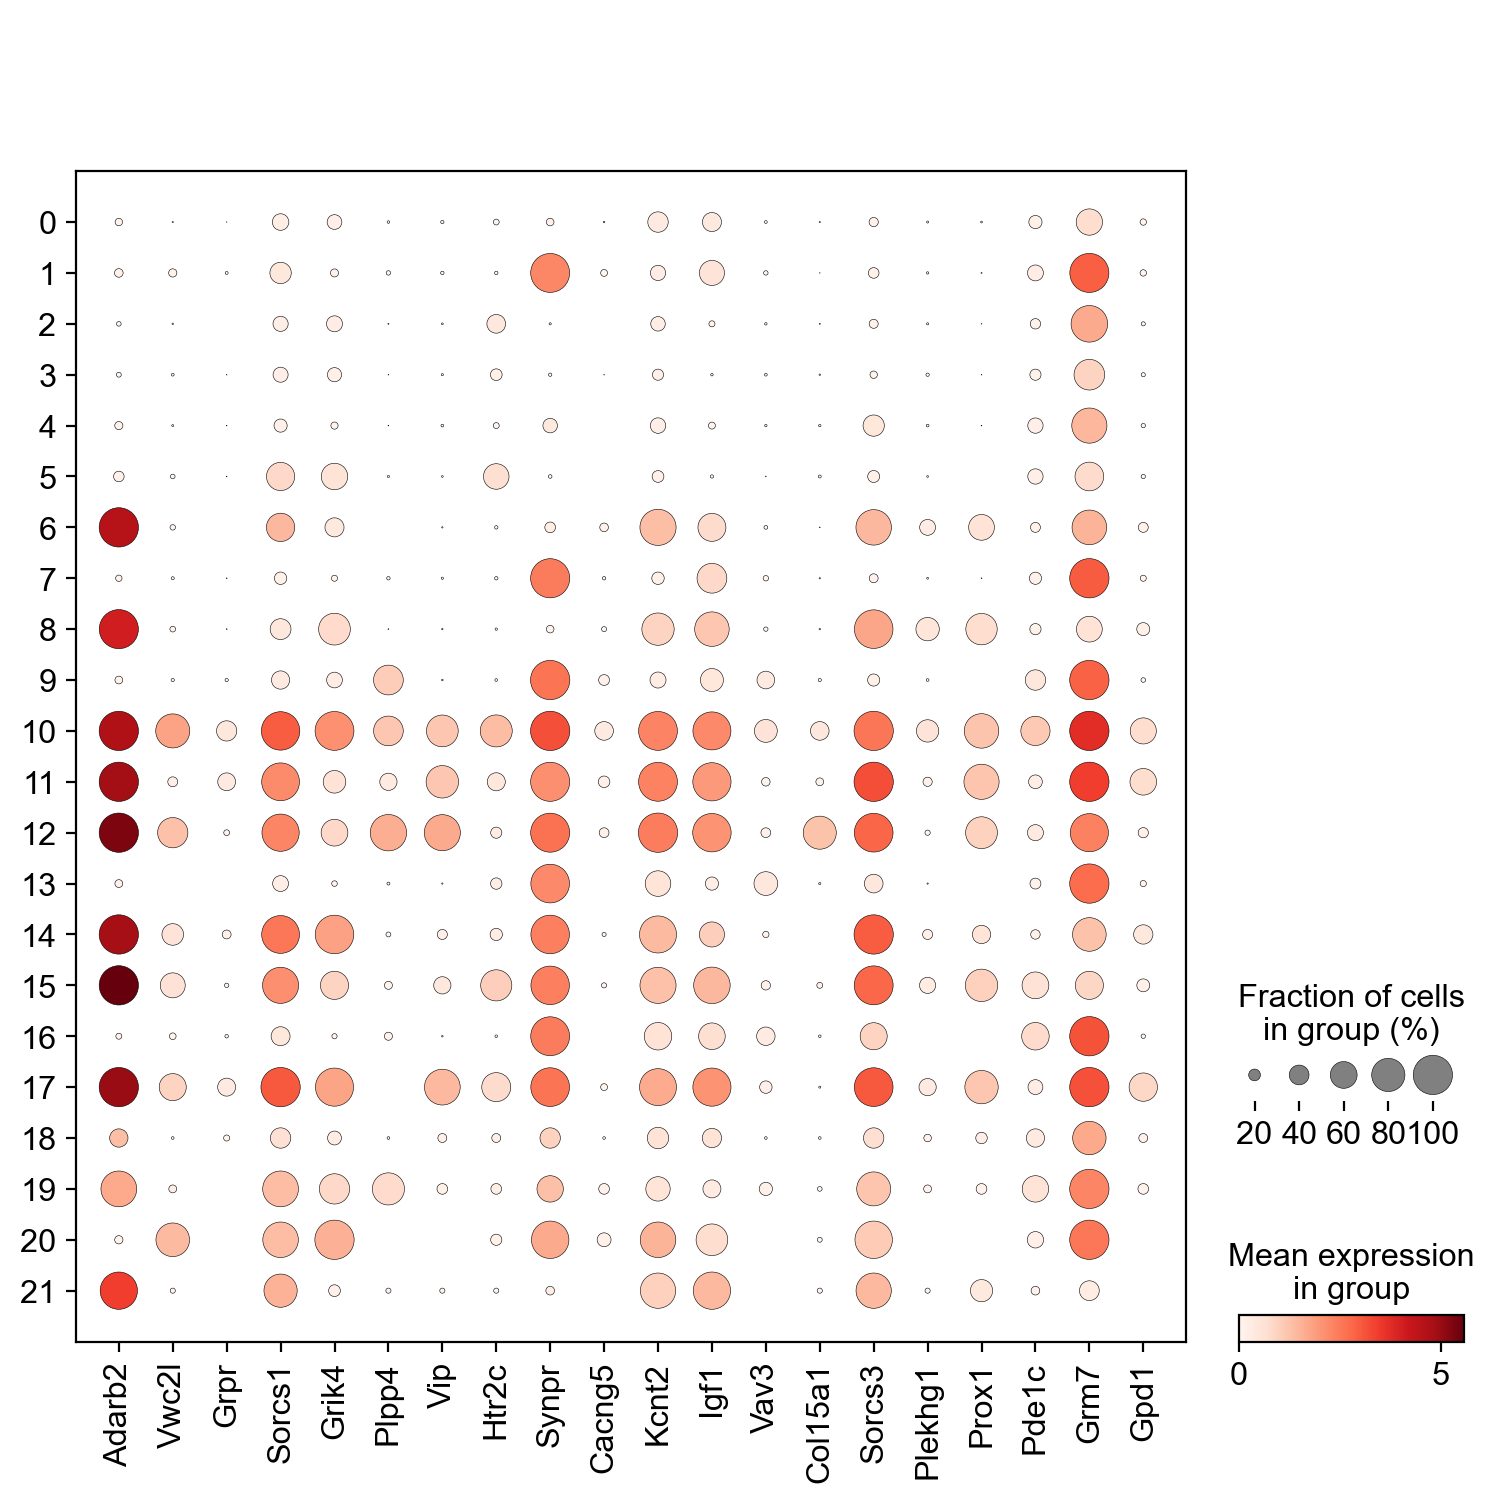

['Adarb2', 'Vwc2l', 'Grpr', 'Sorcs1', 'Grik4', 'Plpp4', 'Vip', 'Htr2c', 'Synpr', 'Cacng5', 'Kcnt2']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


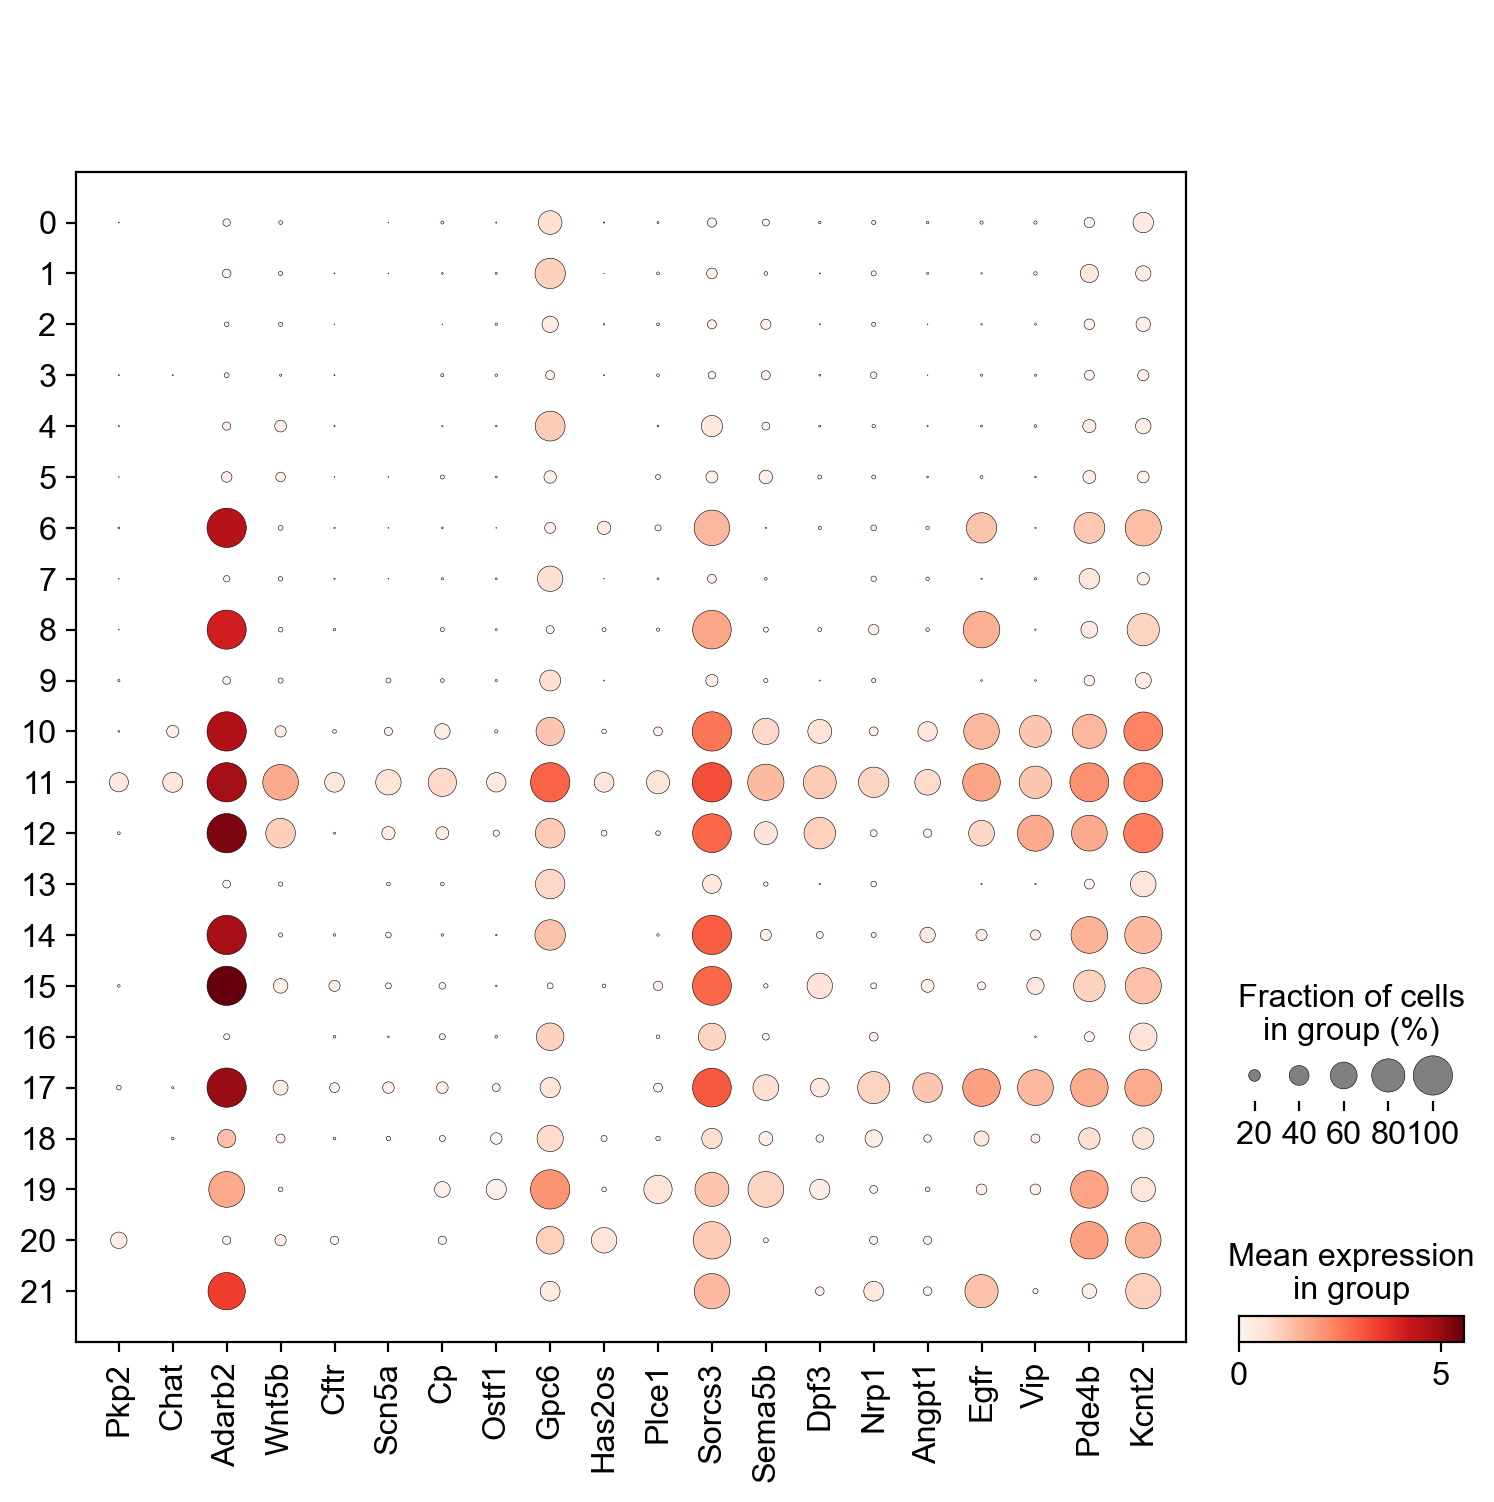

['Pkp2', 'Chat', 'Adarb2', 'Wnt5b', 'Cftr', 'Scn5a', 'Cp', 'Ostf1', 'Gpc6', 'Has2os', 'Plce1']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


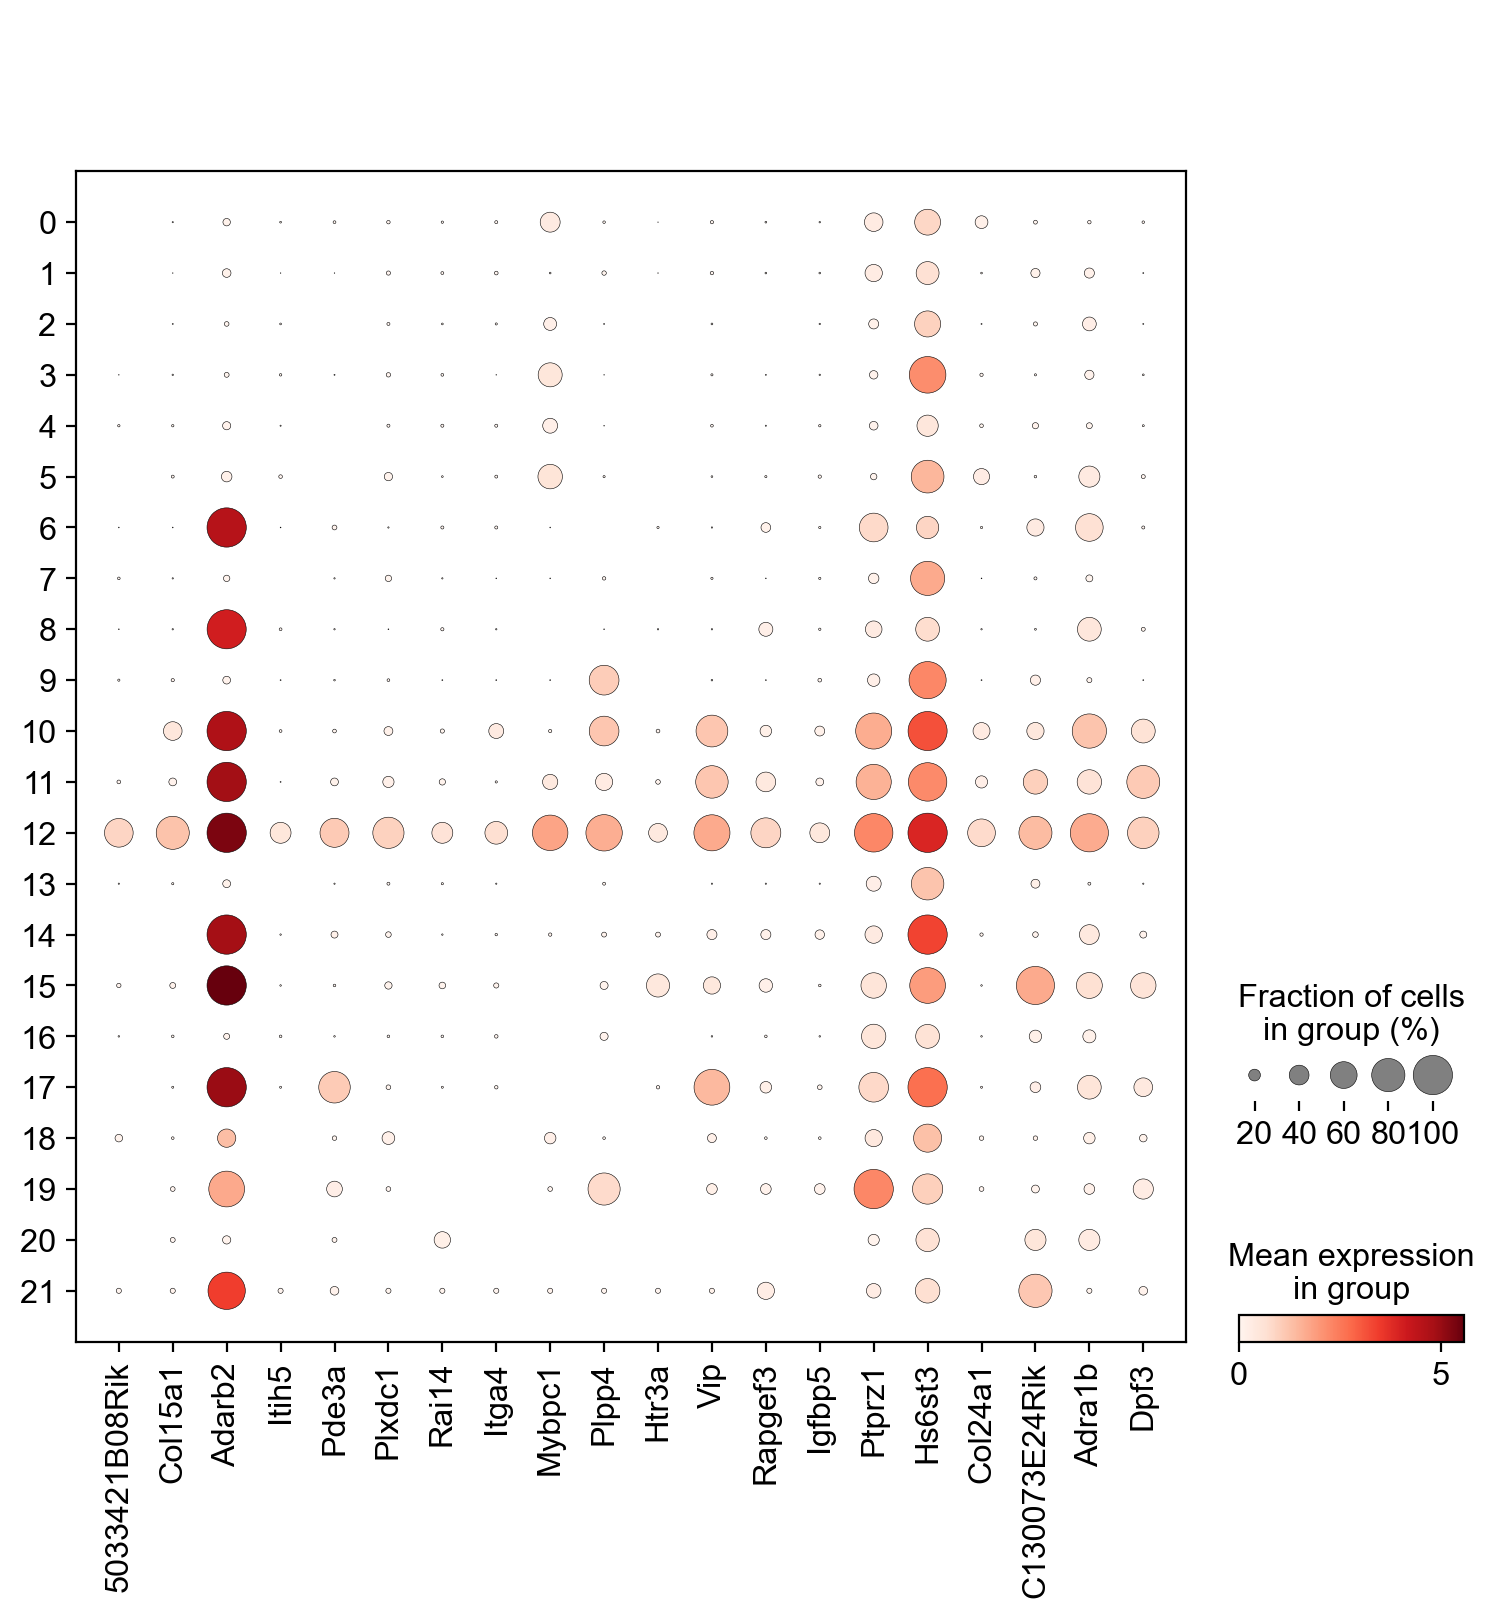

['5033421B08Rik', 'Col15a1', 'Adarb2', 'Itih5', 'Pde3a', 'Plxdc1', 'Rai14', 'Itga4', 'Mybpc1', 'Plpp4', 'Htr3a']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


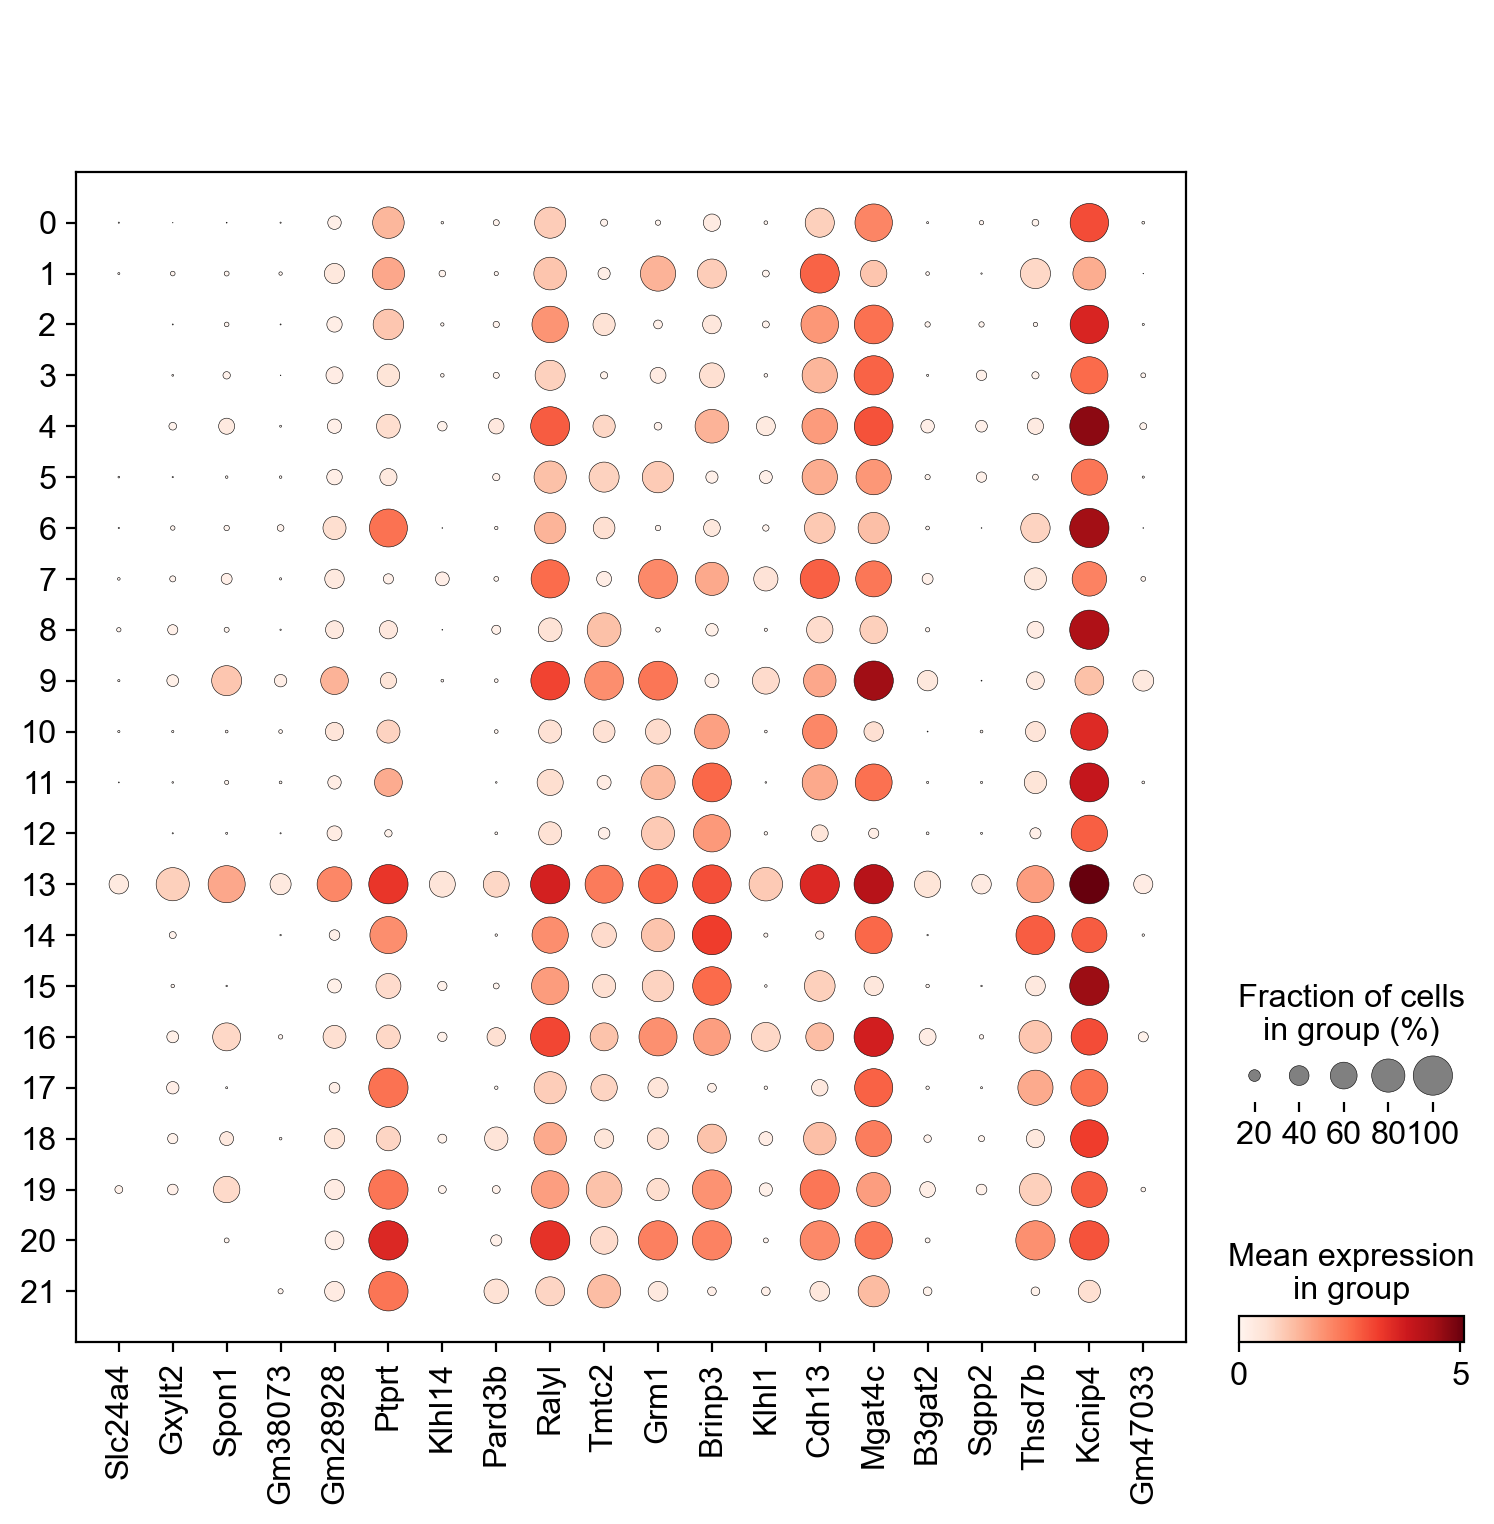

['Slc24a4', 'Gxylt2', 'Spon1', 'Gm38073', 'Gm28928', 'Ptprt', 'Klhl14', 'Pard3b', 'Ralyl', 'Tmtc2', 'Grm1']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


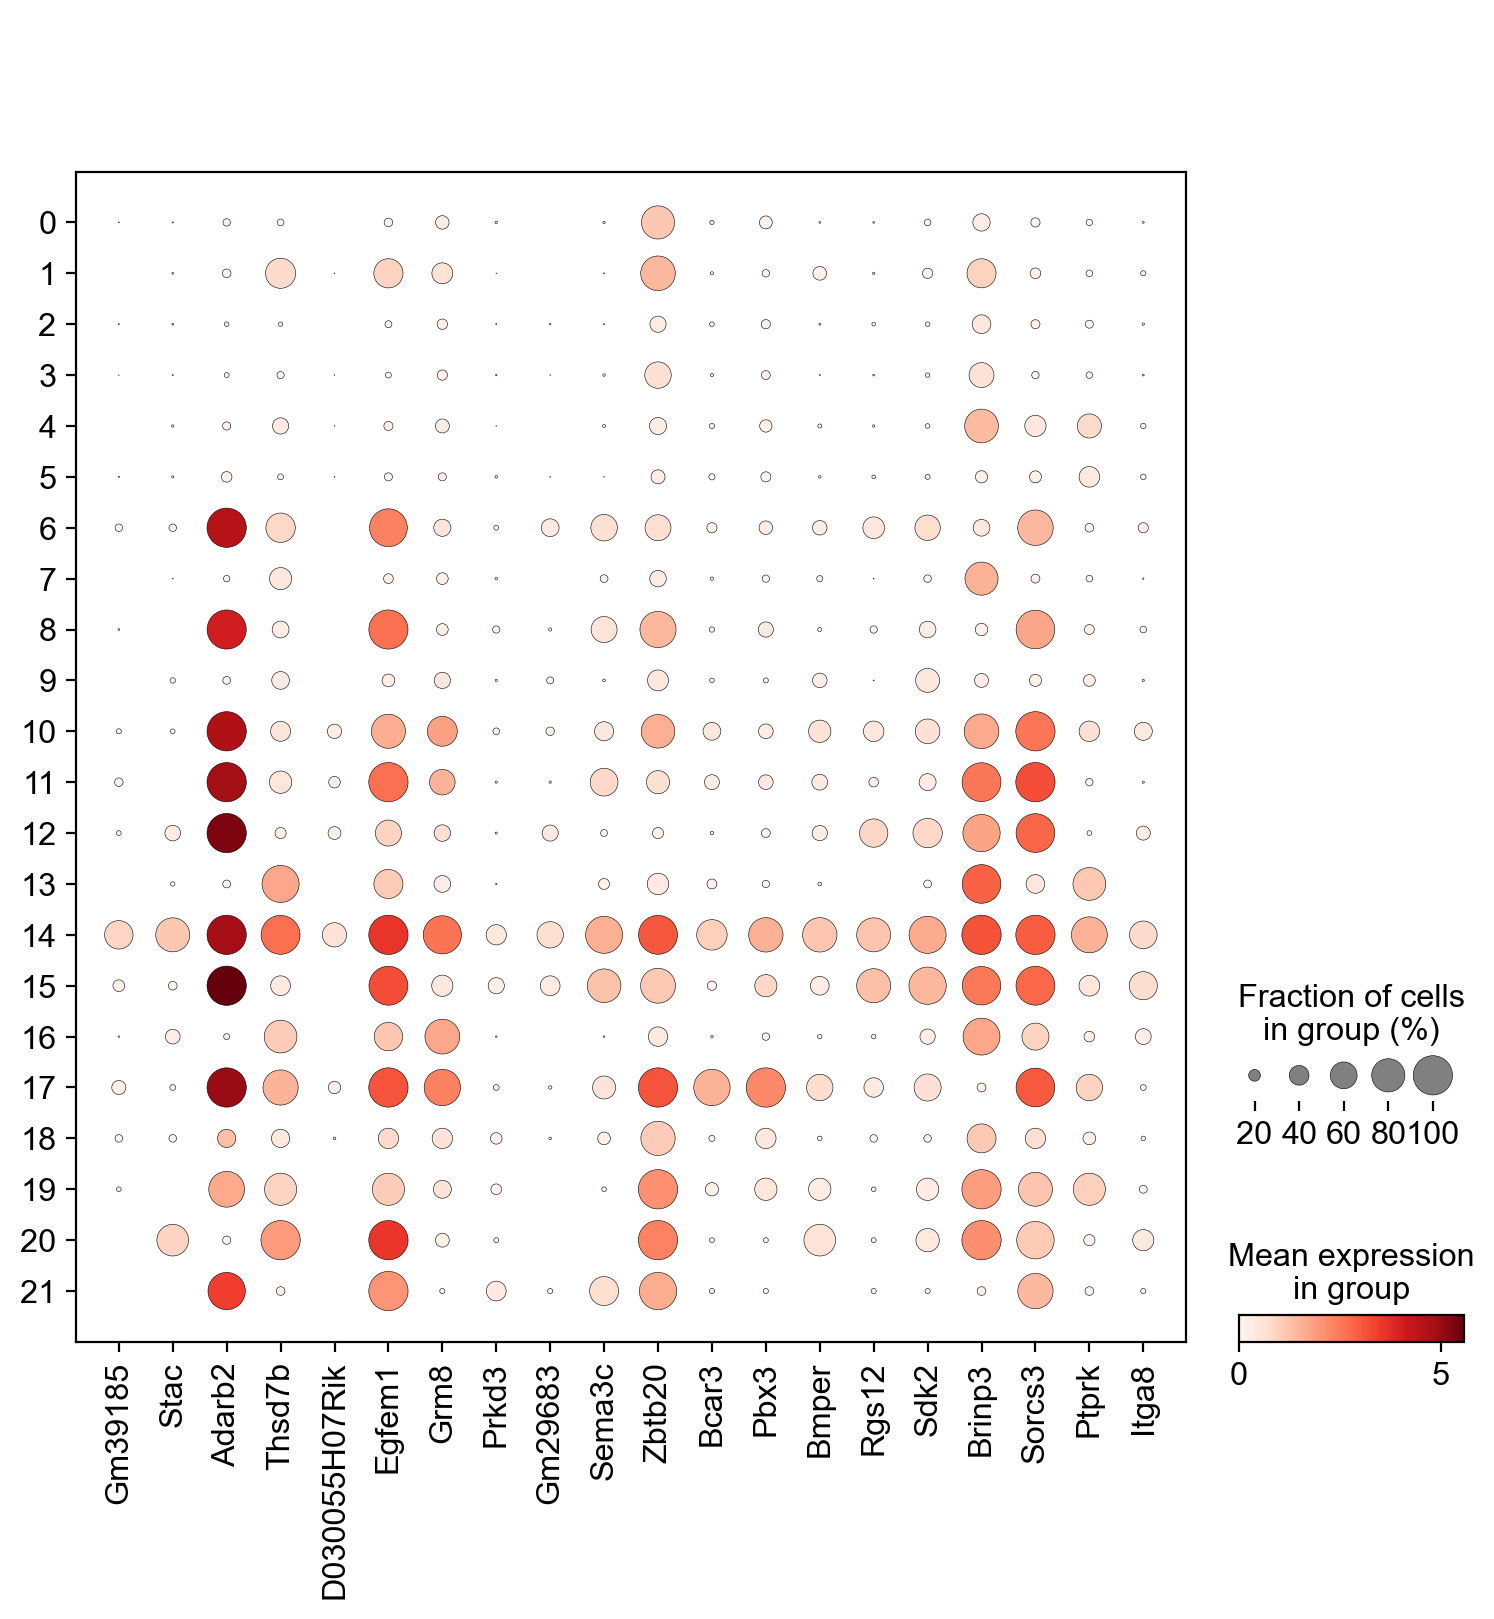

['Gm39185', 'Stac', 'Adarb2', 'Thsd7b', 'D030055H07Rik', 'Egfem1', 'Grm8', 'Prkd3', 'Gm29683', 'Sema3c', 'Zbtb20']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


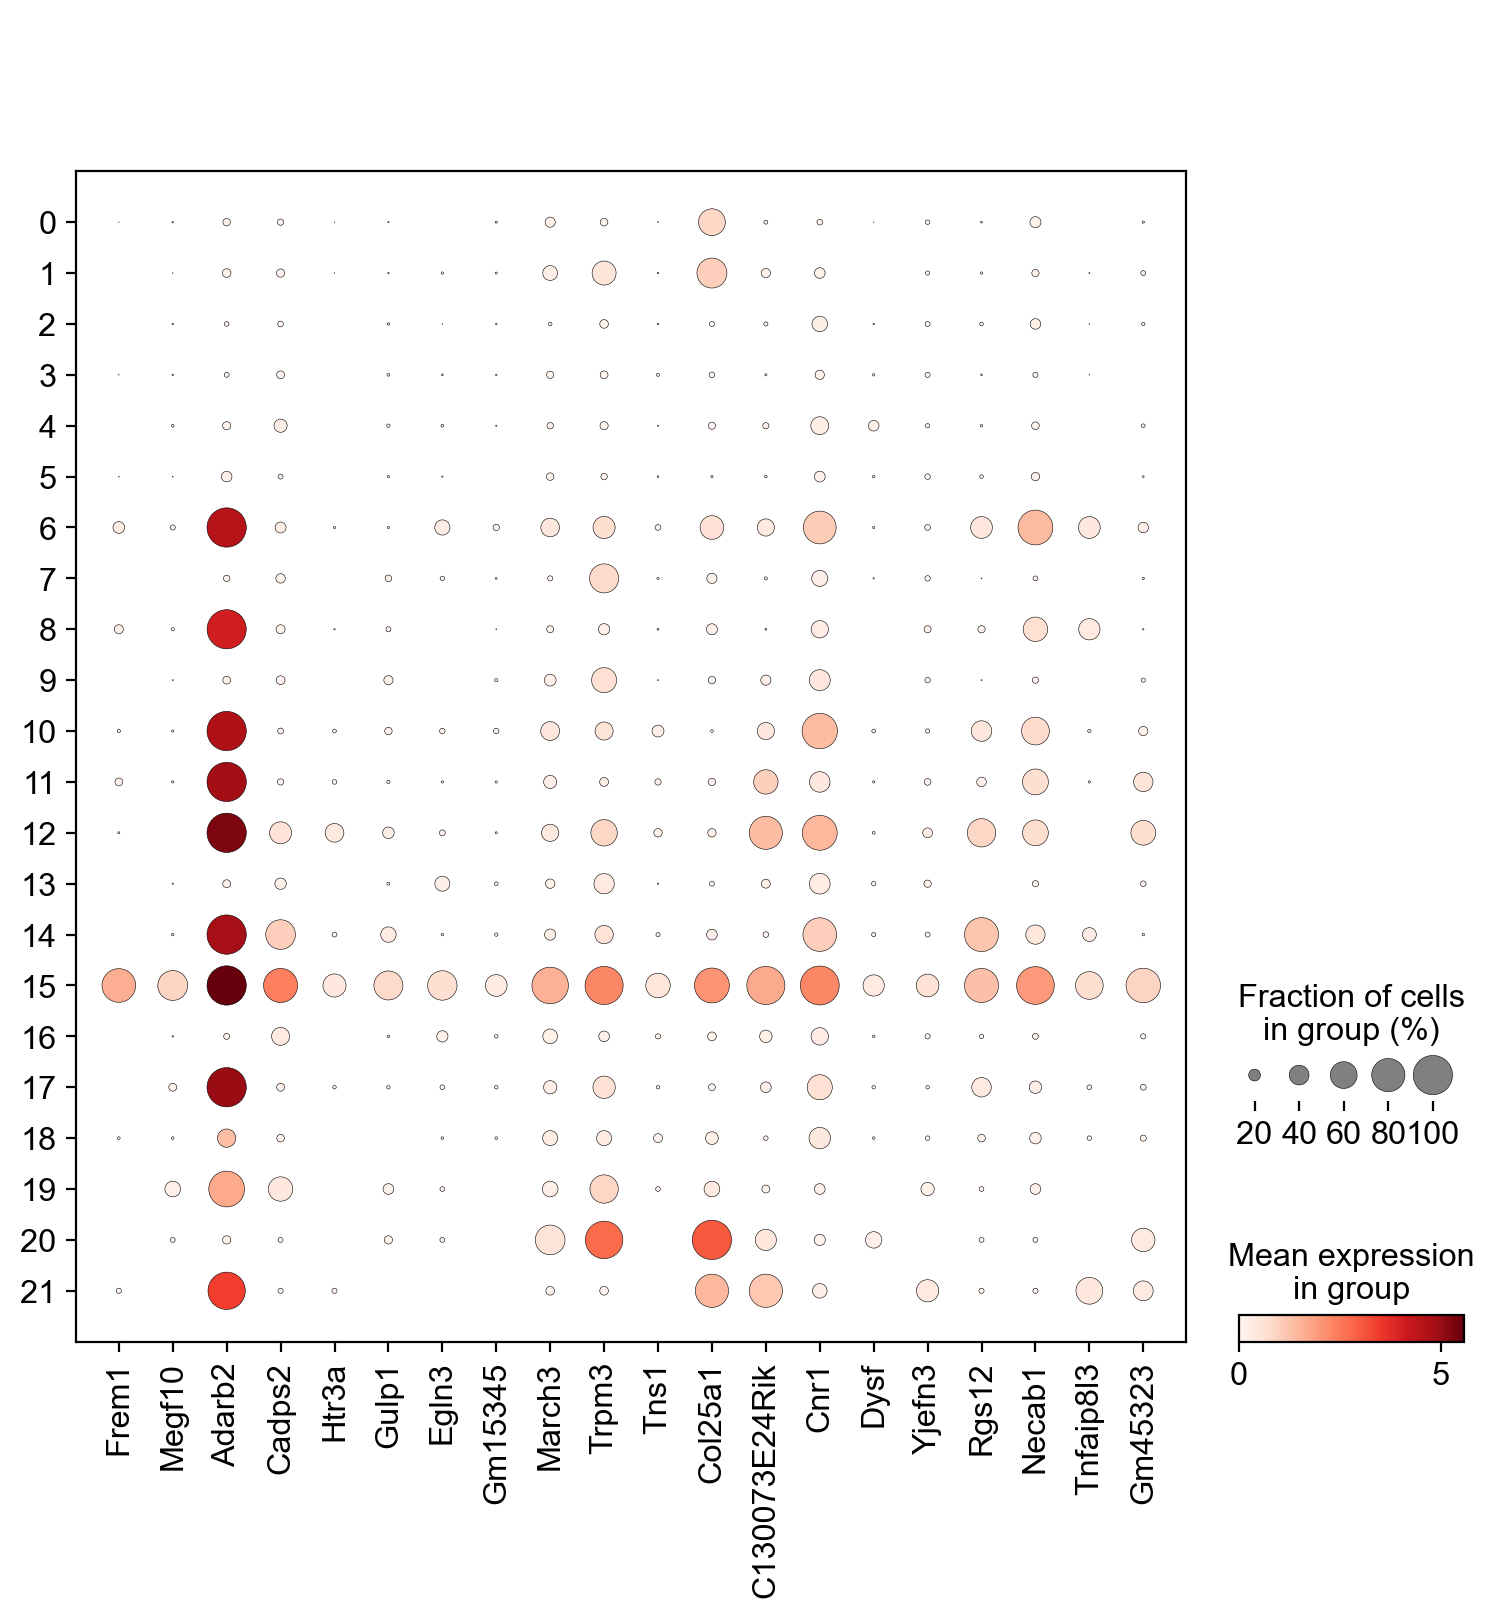

['Frem1', 'Megf10', 'Adarb2', 'Cadps2', 'Htr3a', 'Gulp1', 'Egln3', 'Gm15345', 'March3', 'Trpm3', 'Tns1']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


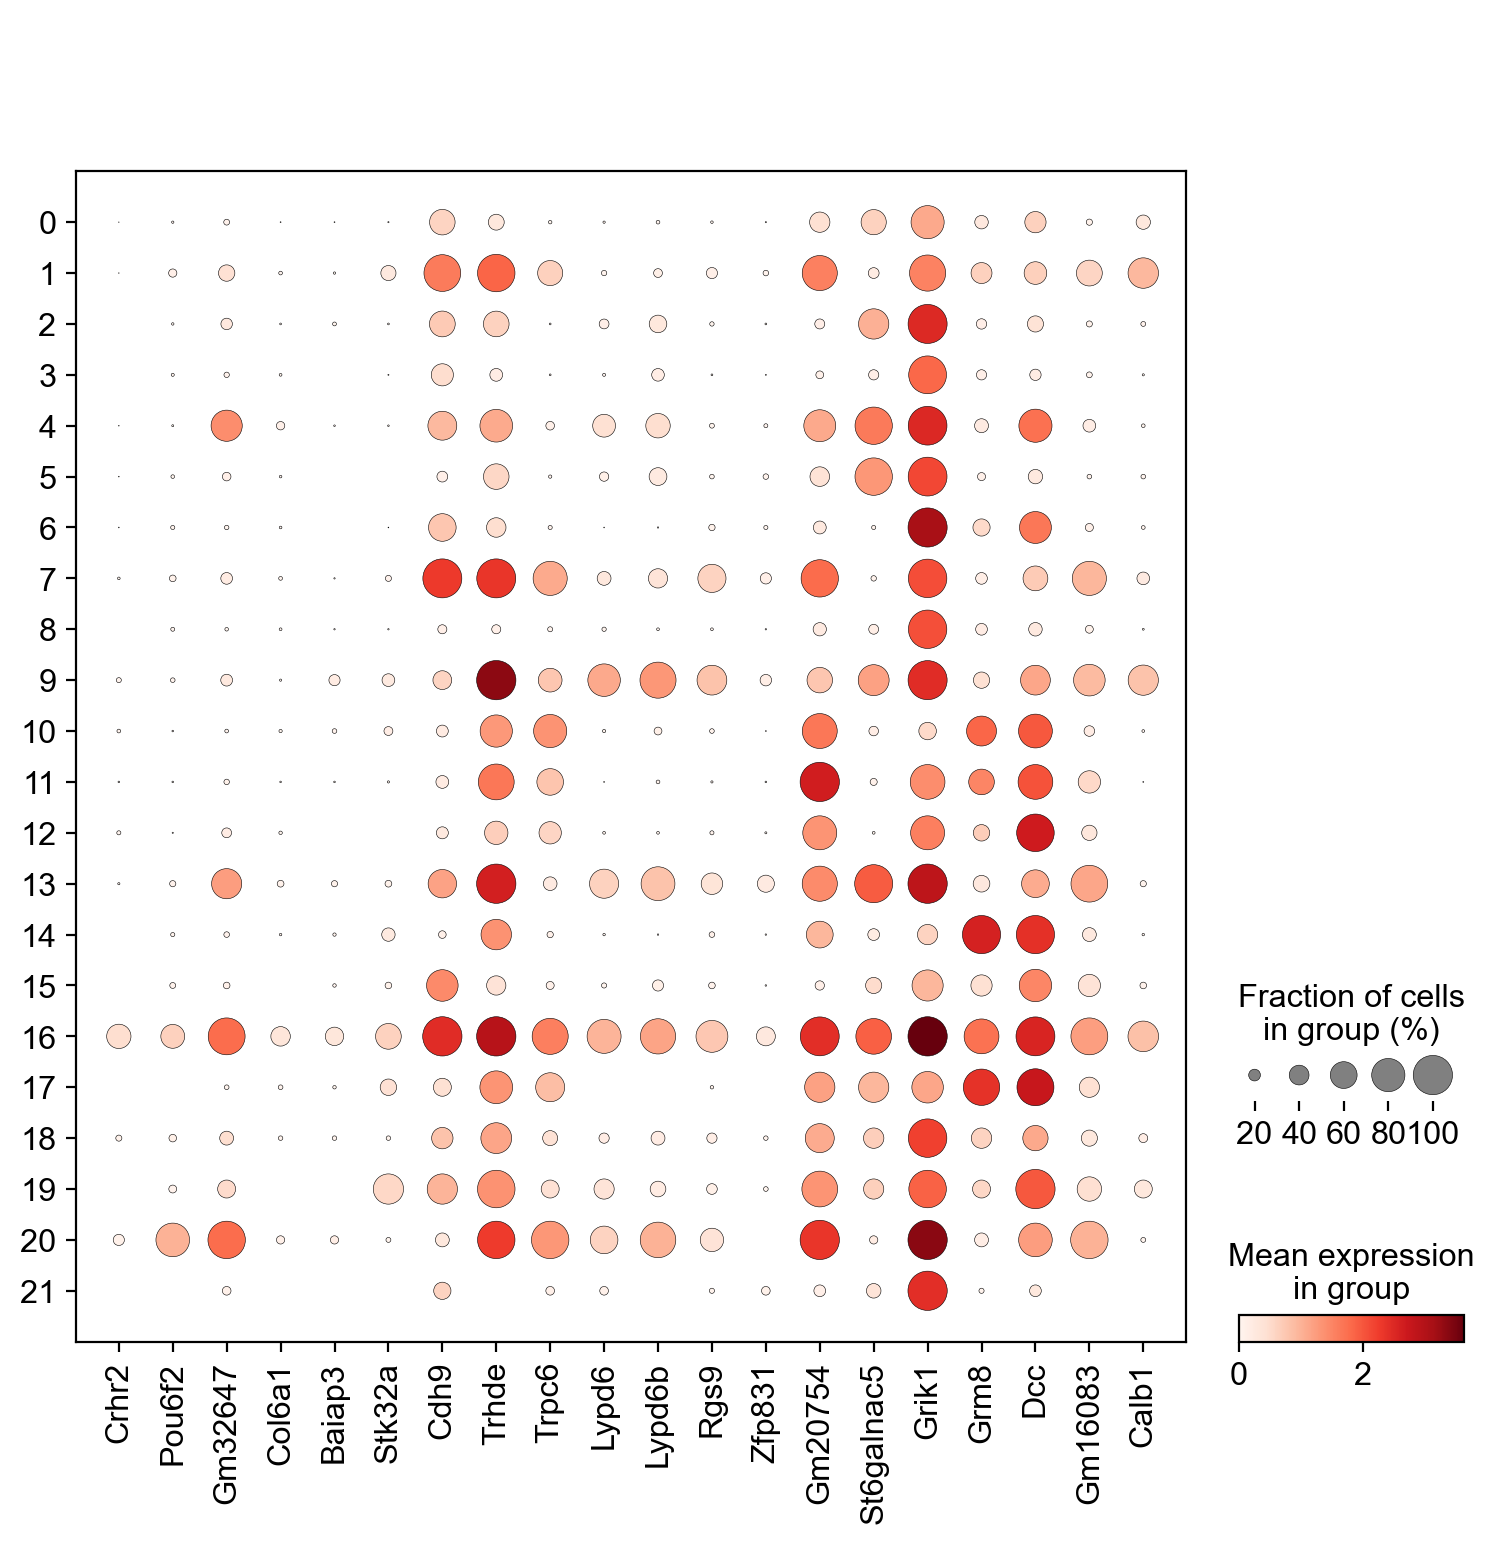

['Crhr2', 'Pou6f2', 'Gm32647', 'Col6a1', 'Baiap3', 'Stk32a', 'Cdh9', 'Trhde', 'Trpc6', 'Lypd6', 'Lypd6b']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


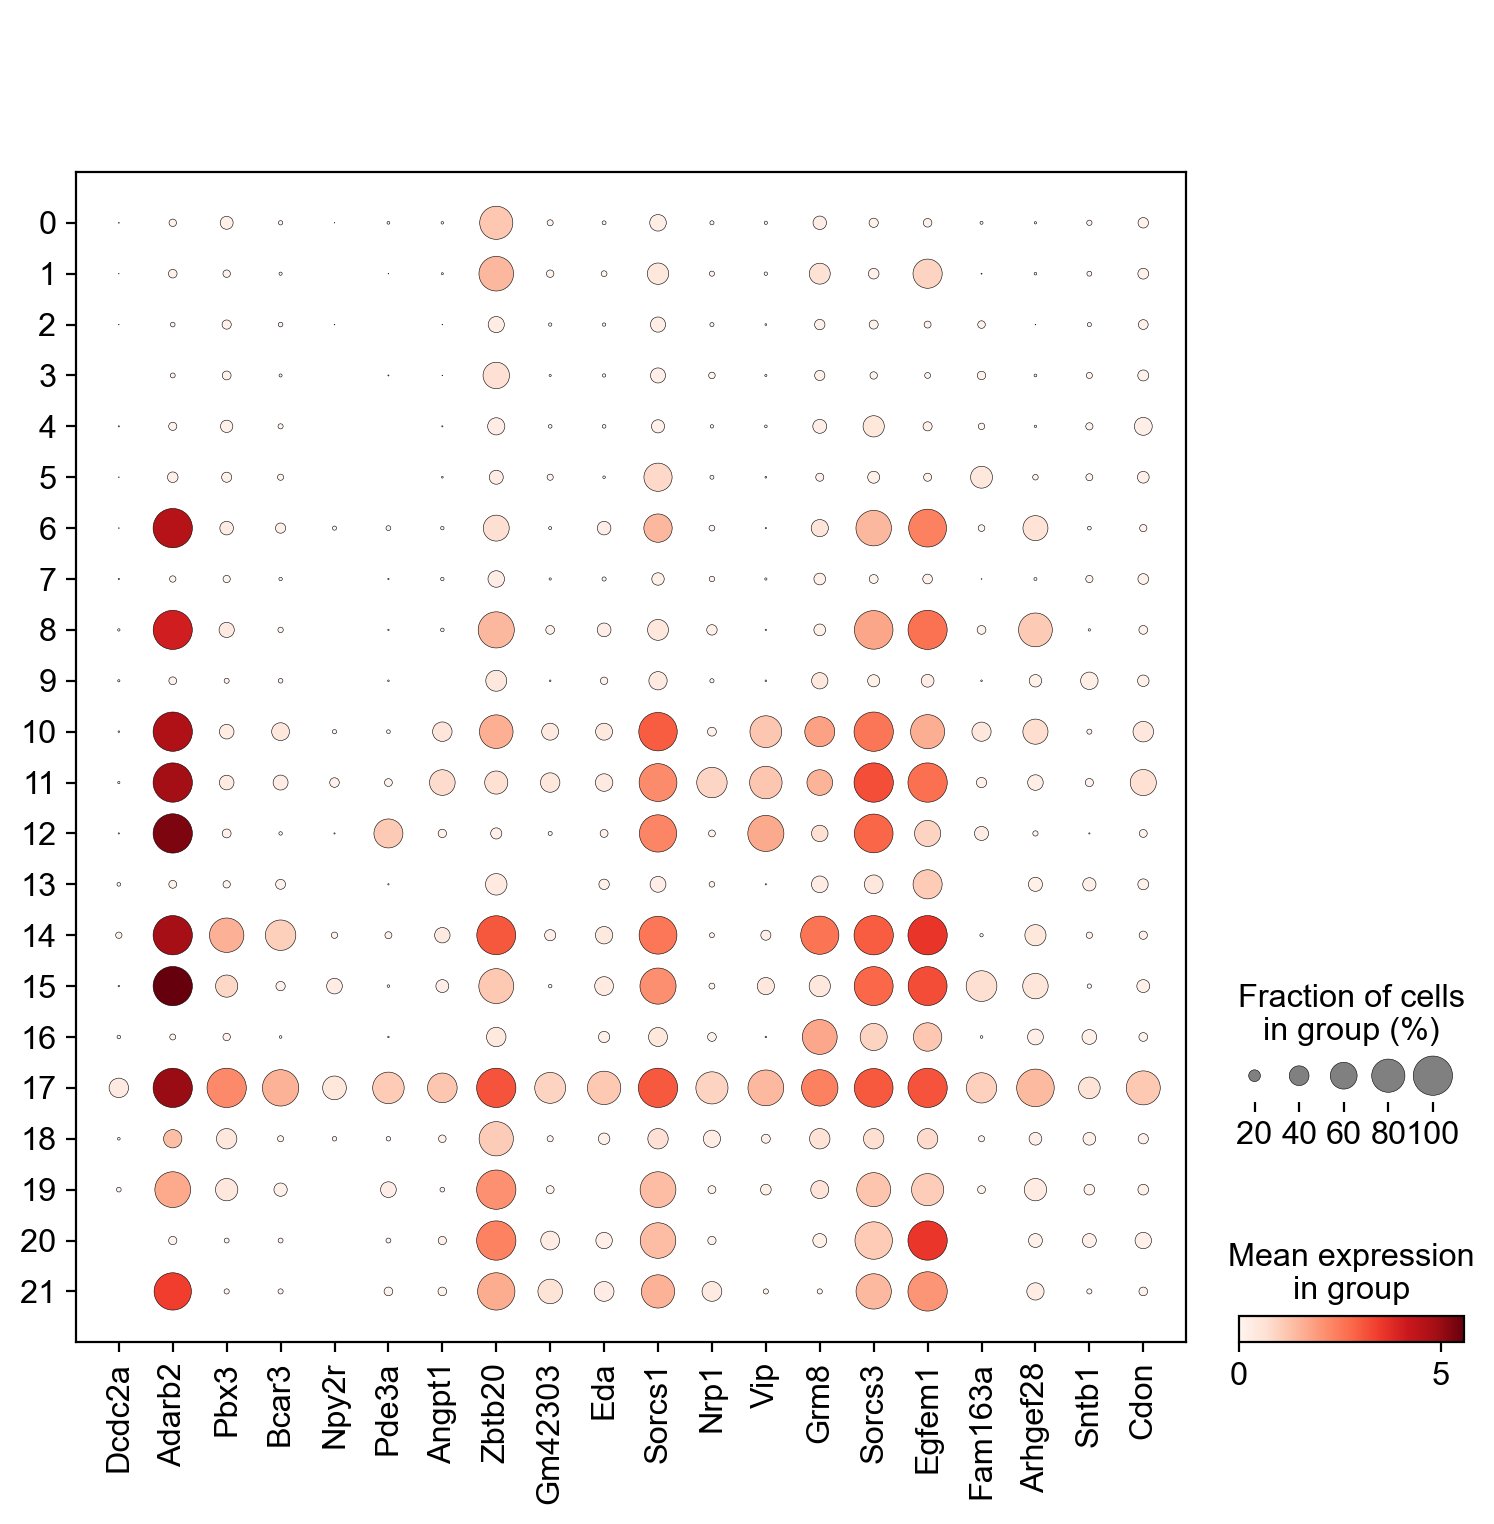

['Dcdc2a', 'Adarb2', 'Pbx3', 'Bcar3', 'Npy2r', 'Pde3a', 'Angpt1', 'Zbtb20', 'Gm42303', 'Eda', 'Sorcs1']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


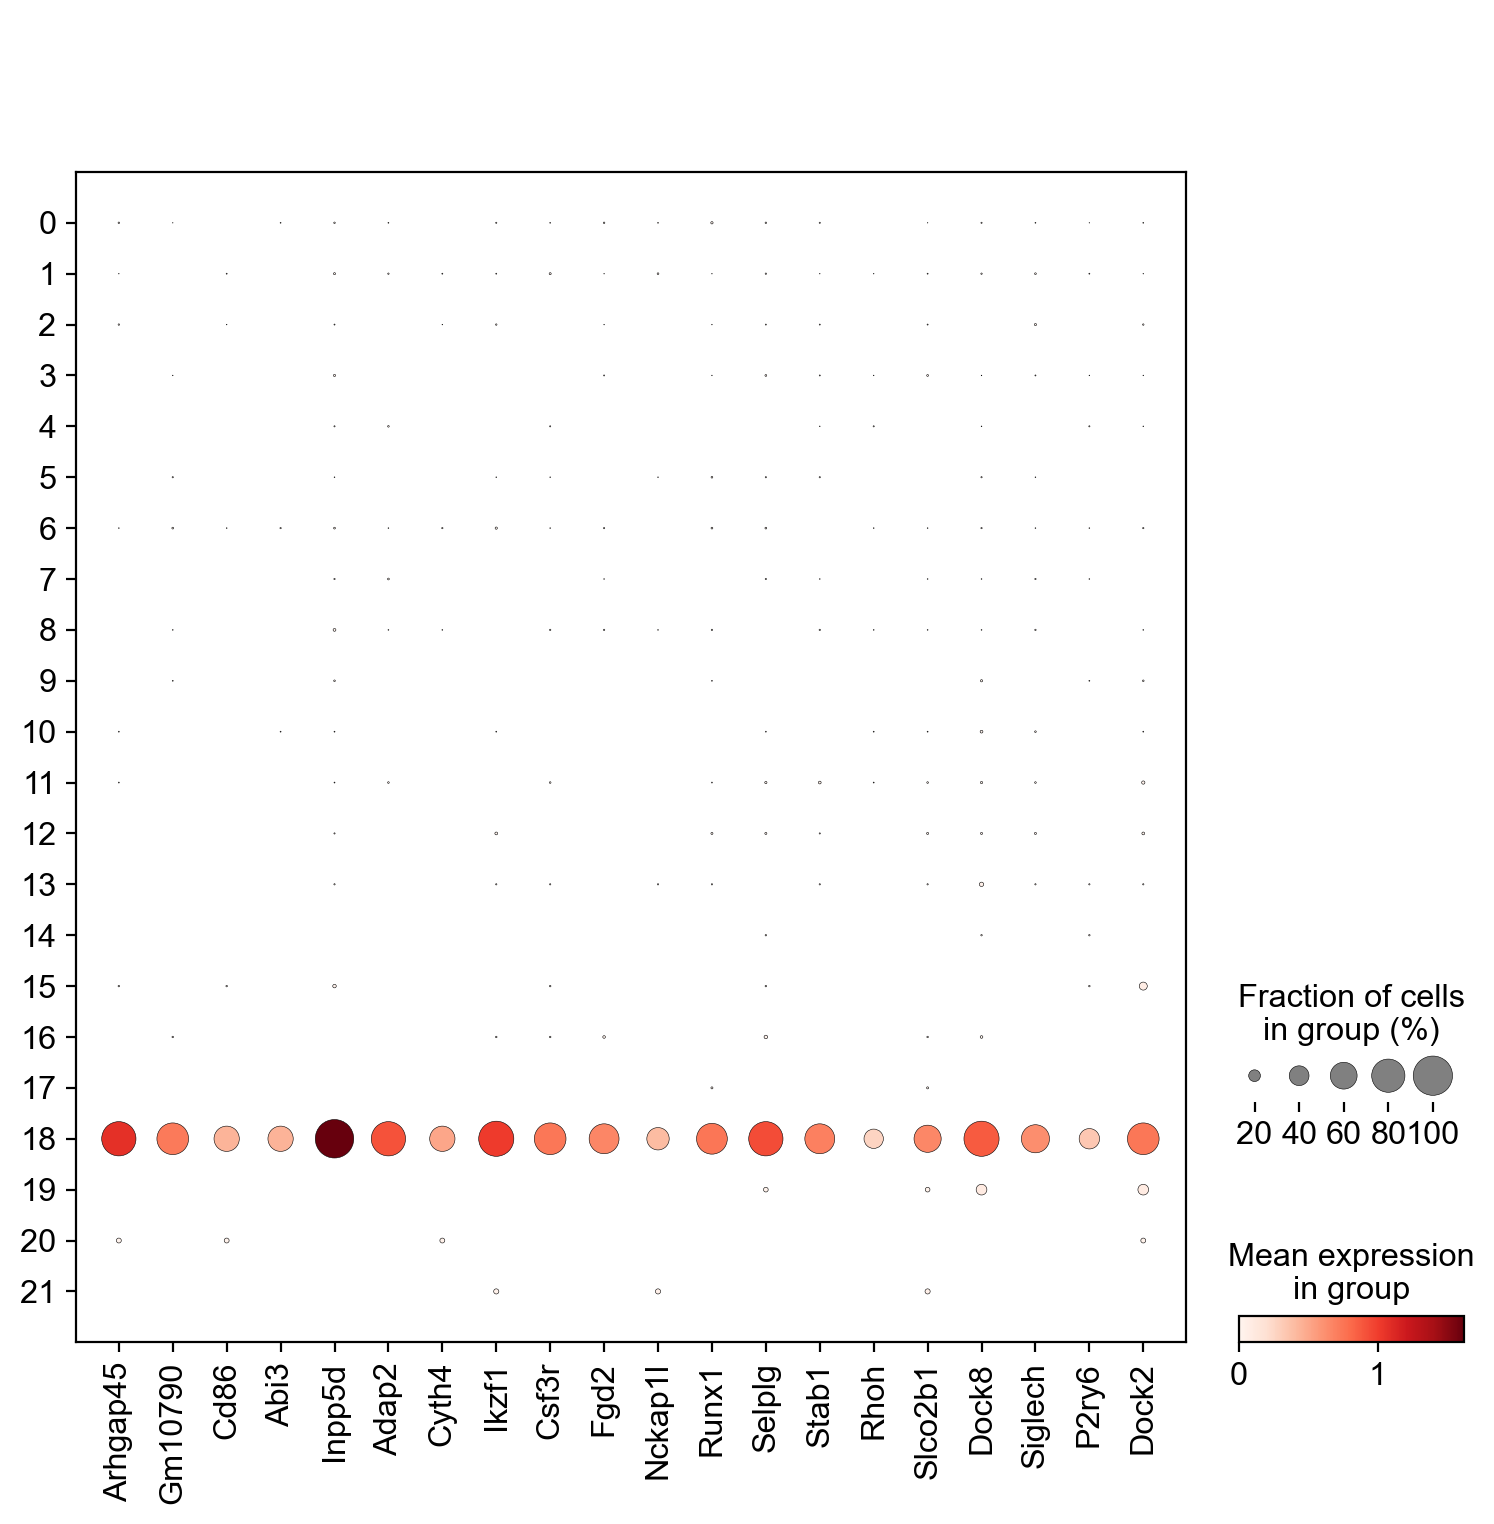

['Arhgap45', 'Gm10790', 'Cd86', 'Abi3', 'Inpp5d', 'Adap2', 'Cyth4', 'Ikzf1', 'Csf3r', 'Fgd2', 'Nckap1l']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


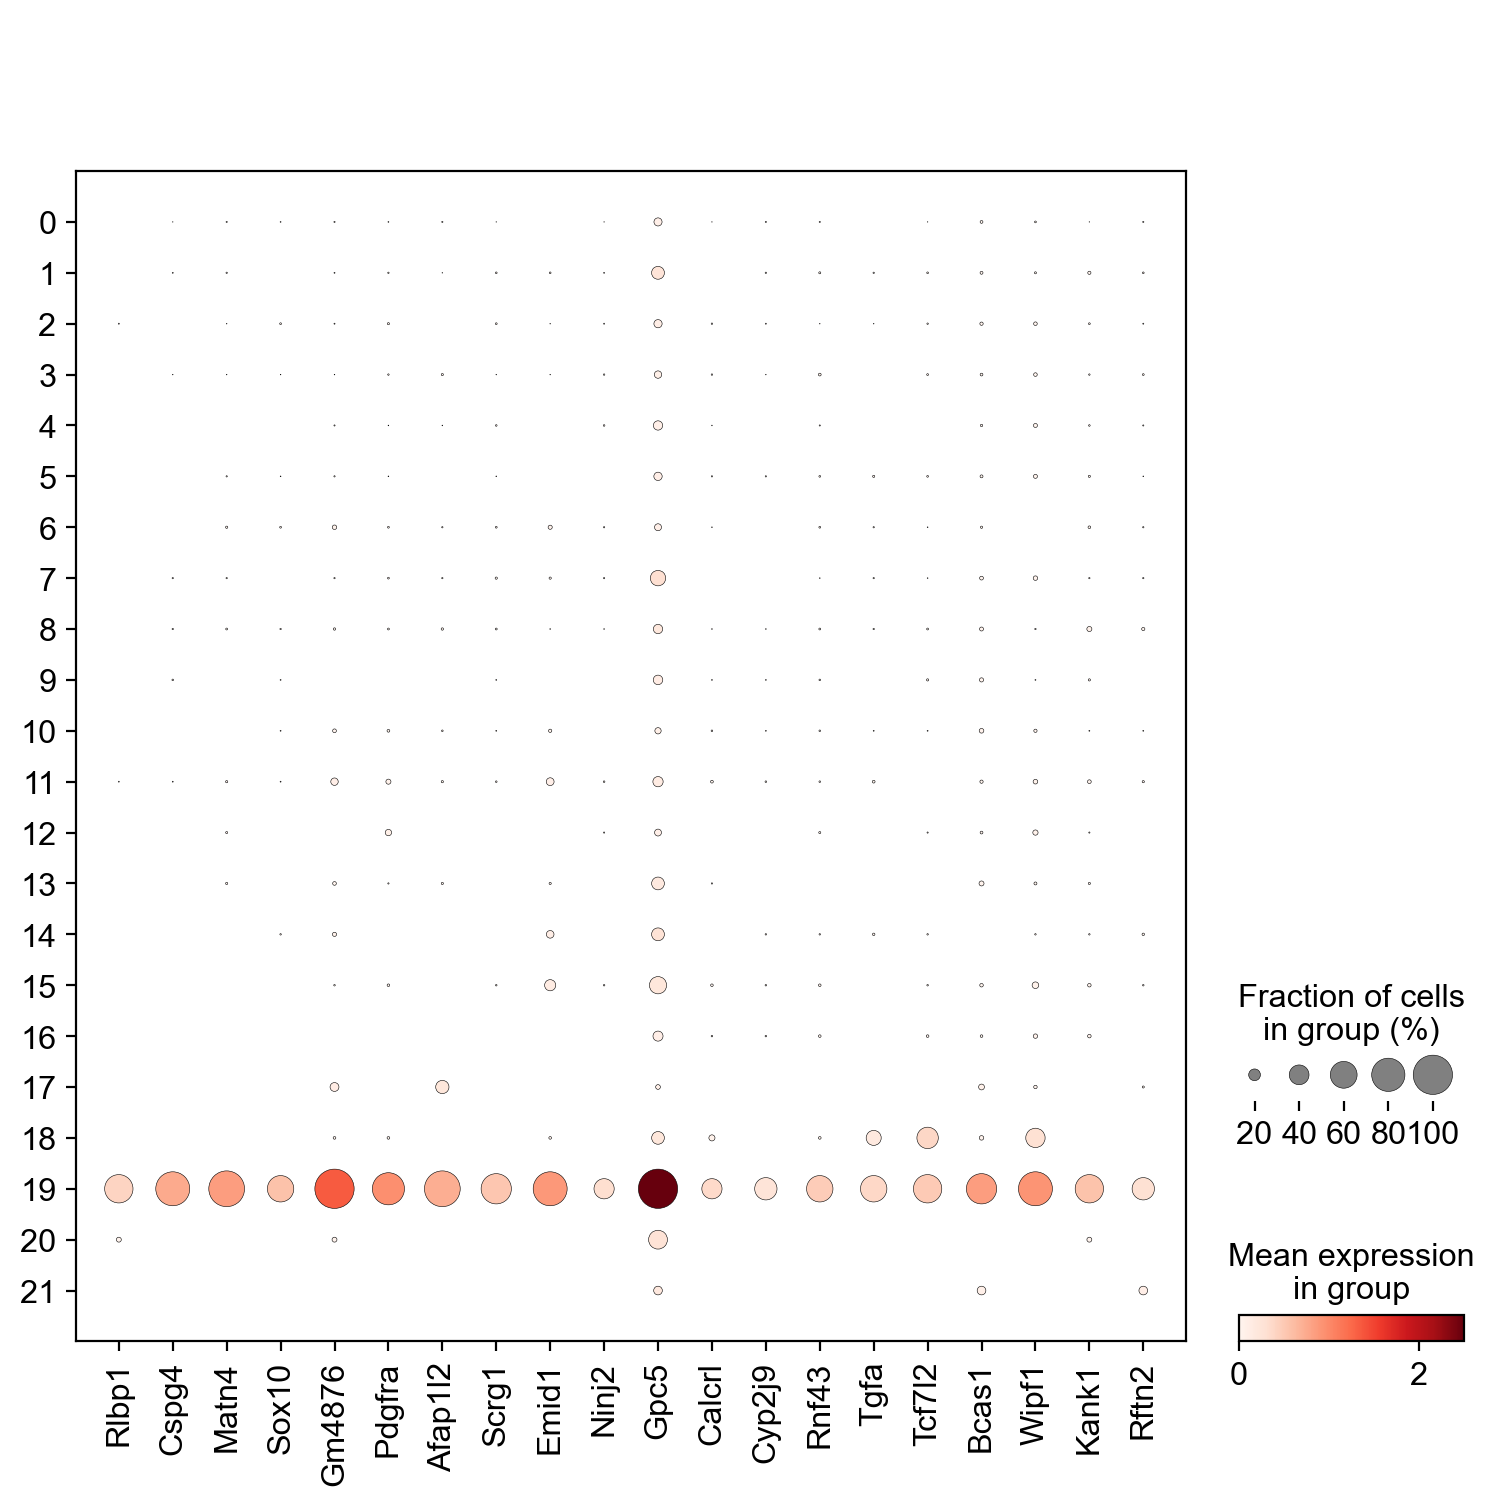

['Rlbp1', 'Cspg4', 'Matn4', 'Sox10', 'Gm4876', 'Pdgfra', 'Afap1l2', 'Scrg1', 'Emid1', 'Ninj2', 'Gpc5']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


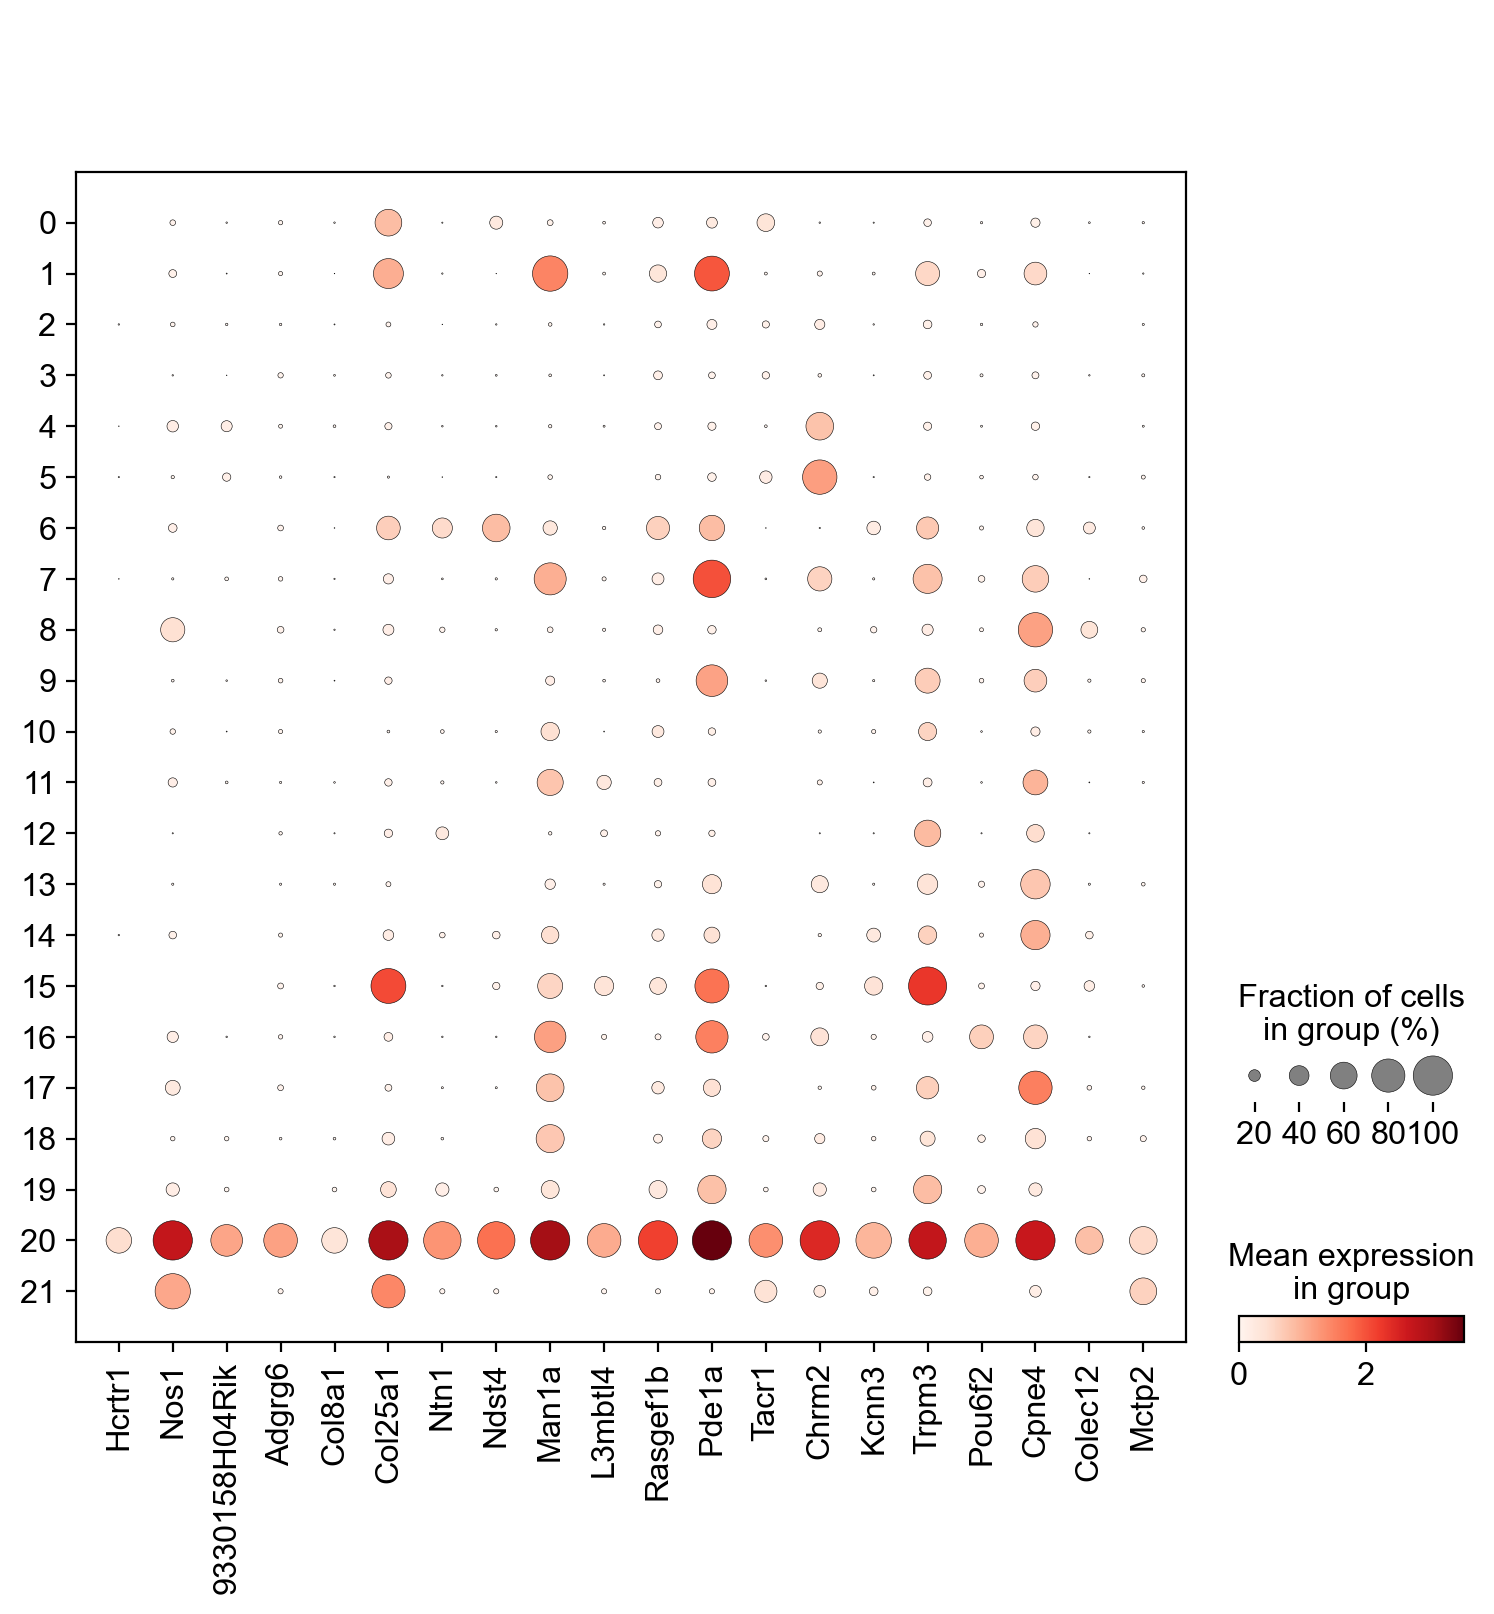

['Hcrtr1', 'Nos1', '9330158H04Rik', 'Adgrg6', 'Col8a1', 'Col25a1', 'Ntn1', 'Ndst4', 'Man1a', 'L3mbtl4', 'Rasgef1b']
ranking genes


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


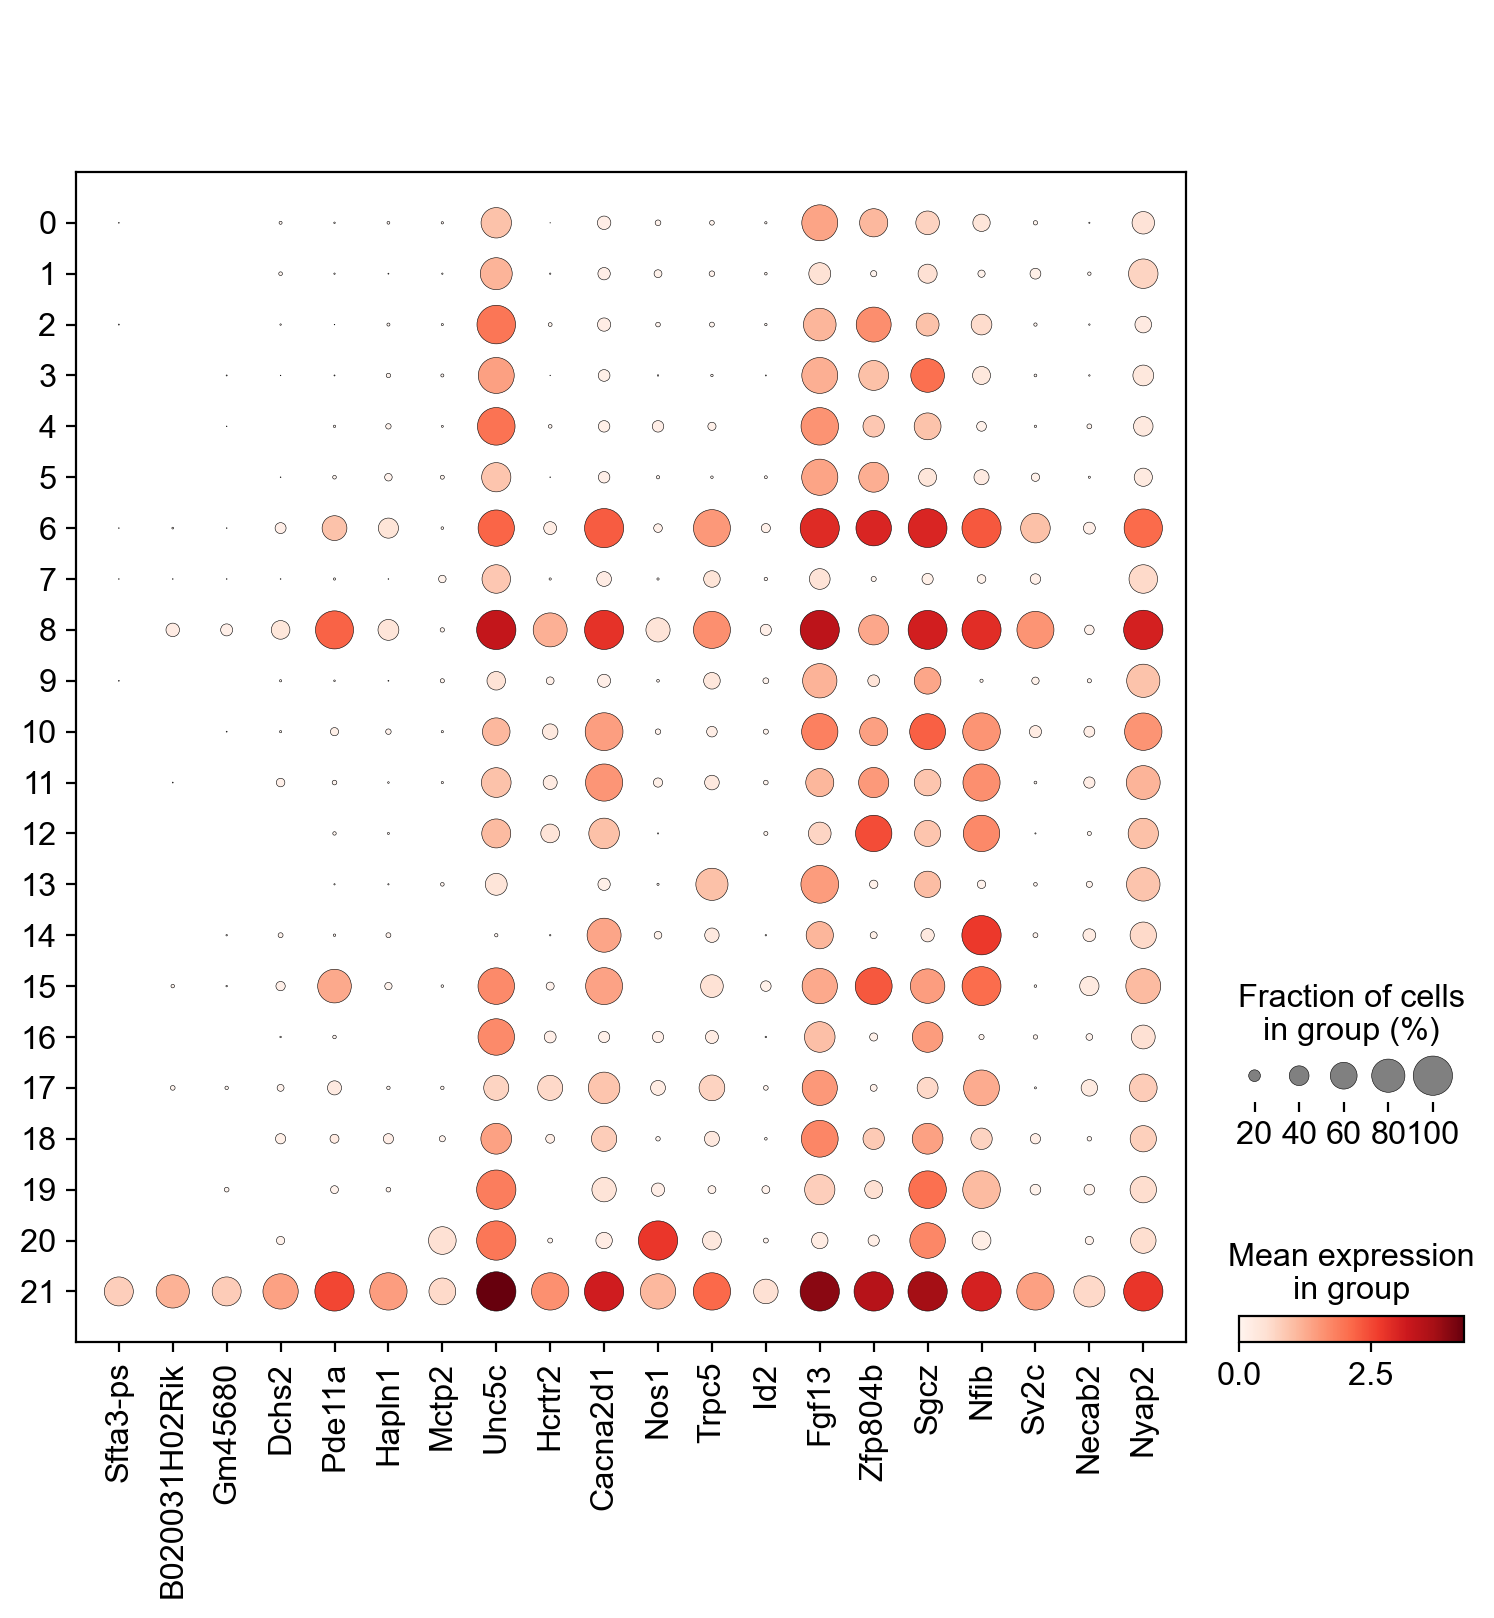

['Sfta3-ps', 'B020031H02Rik', 'Gm45680', 'Dchs2', 'Pde11a', 'Hapln1', 'Mctp2', 'Unc5c', 'Hcrtr2', 'Cacna2d1', 'Nos1']


In [19]:
for i in P28_gaba.obs.leiden.values.categories:
    cluster = i
    sc.tl.rank_genes_groups(P28_gaba, groupby='leiden', groups=[cluster], reference='rest', method='wilcoxon', n_genes=200)
    #wilcGenes23vRest = list(P28_gaba.uns['rank_genes_groups']['names'].astype([(cluster, '<U50')]).view('<U50'))  #list of genes ordered by wilc score
    #if ('Malat1' in wilcGenes23vRest): del wilcGenes23vRest[wilcGenes23vRest.index('Malat1')]

    wilcLF8v14 = P28_gaba.uns['rank_genes_groups']['logfoldchanges'].astype([(cluster, '<f8')]).view('<f8') #log fold changes ordered by score

    wilcGenes8v14_s = list(P28_gaba.uns['rank_genes_groups']['names'].astype([(cluster, '<U50')]).view('<U50'))  #list of genes ordered by wilc score
    wilcLF8v14_s = P28_gaba.uns['rank_genes_groups']['logfoldchanges'].astype([(cluster, '<f8')]).view('<f8') #numpy array of logfoldchnages to be ordered lowest to highest
    wilcLF8v14_s.sort() #log fold changes from lowest to highest
    wilcGenes8v14 = [] #list of genes ordered by logfold change: low to high
    for i in wilcLF8v14_s:
        gene_idx = np.where(wilcLF8v14 == i)[0][0]
        wilcGenes8v14.append(wilcGenes8v14_s[gene_idx])
    wilcGenes8v14_correct = []
    for i in reversed(wilcGenes8v14):
        wilcGenes8v14_correct.append(i) # #list of genes ordered by logfold change high to low

    sc.pl.dotplot(P28_gaba, wilcGenes8v14_correct[0:20], groupby='leiden')
    print(wilcGenes8v14_correct[0:11])

In [21]:
P28_gaba.write_h5ad('P28_dl_gaba_analyzed.h5ad')

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
